# AA228 Project

In [0]:
using PyPlot
using POMDPs
using Random # for AbstractRNG
using POMDPModelTools # for Deterministic
using POMDPSimulators
using POMDPPolicies
using POMDPModels # for the GridWorld problem
using MCTS
using D3Trees

### Defining the state vector

#### Defining the nfired vector
Contains the number of missiles of each type fired from each launcher

In [0]:
#Here suppose 2 launchers can launch terminal phase missiles and 2 launcher can launch mid-course phase missiles
nmid=1
nter=2
#intial state nothing has been fired
nfired0=[0 for i in 1:nmid+nter]

3-element Array{Int64,1}:
 0
 0
 0

#### Defining the nremaining vector
Contains the number of missiles of each type remaining in the magazine and in the chamber for all launchers

In [0]:
#Here suppose 24 missiles can be held in the chamber and 4 can be held in the magazine for terminal launchers
# and 4 missiles can be held in the chamber and 12 in the magazine for midcourse launchers
n_mag_mid=24
n_mag_ter=12
n_chamber_mid=24
n_chamber_ter=4
#intitial state both chambers and magazines are full
nremaining0=[n_chamber_mid for i in 1:nmid]
nremaining0=vcat(nremaining0,[n_chamber_ter for i in 1:nter])
nremaining0=vcat(nremaining0,[n_mag_mid for i in 1:nmid])
nremaining0=vcat(nremaining0,[n_mag_ter for i in 1:nter])

6-element Array{Int64,1}:
 24
  4
  4
 24
 12
 12

#### Defining the target status vector
Contains the number of health points of our targets

In [0]:
#here suppose we have 2 targets with health points [100,20] and the launchers with health points [2,2,2,2]
ntargets=4
health=[100,20,1,1]

#initially everything is healthy
targetstatus0=health

4-element Array{Int64,1}:
 100
  20
   1
   1

#### Defining the time to target vector
Contains the time to target of observed missiles. Can observe a maximum of missiles ntrack at any given moment and will show -1 if no missiles are observed

In [0]:
#here suppose we can track 25 missiles, and that -1 means no missiles are observed
ntrack=100
#initially no missiles are seen
timetotarget0=[-1 for i  in 1:ntrack]

100-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

#### Defining the type of target vector
Contains the type of target of each observed missile. Ranges from 1 to ntargets and is set to 0 if no missile is observed

In [0]:
#initially no missiles are seen
target0=[0 for i  in 1:ntrack]

100-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

#### Defining the type of missile vector
Contains the type of each incoming missile. Ranges from 1 to ntypes and is set to 0 if no missiles are observed

In [0]:
#initially no missiles are seen
ntype=2
type0=[0 for i  in 1:ntrack]

100-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

#### Defining the state vector
state vector: s=(nfired,nrem,status of targets,time to target)

In [0]:
time0=[0]
state0=vcat(nfired0,nremaining0,targetstatus0,timetotarget0,target0,type0,time0)

314-element Array{Int64,1}:
   0
   0
   0
  24
   4
   4
  24
  12
  12
 100
  20
   1
   1
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

In [0]:
print(state0)
print("Length of a state vector is: ")
print(length(state0))

[0, 0, 0, 24, 4, 4, 24, 12, 12, 100, 20, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Defining model parameters and model functions

- [multipliers] Multipliers decribing importance of each target
- [costs] Cost incurred when firing each type of missiles
- [reward_kill] Reward observed when shooting down each type of ennemy missile

In [0]:
costs=[0.05,0.05/5] #a terminal missile is not as costly as a mid-course one
reward_kill=0.05/10

0.005

The intercept function takes as argument an index, an action and a state and returns True if the incoming missile indexed by the index is intercepted, no otherwise.
The following parameters are defined:
- rangemid: the range of time during which a long-range missile can intercept an incoming missile
- range ter: the range of time during which a long rage missile can intercept an incoming missile
- pkill: a matric containing the probablity of killing a missile of each type with a missile of each type

The intercept function will look at the number of missiles of each type fired at the indexed missile and output true if the range is correct with probability 1-(1-pkill)^nfired which means at least one of the missiles launched hit the incoming missile

In [0]:
pkill=[[0.8,0.8],[0.7,0.5]]
rangemid=6
rangeter=2

function interceptMDP(index::Int,action::Array{Int64,1},state::Array{Int64,1},rng::AbstractRNG)
    midfired=sum(action[index+k*ntrack] for k in 0:(nmid-1))
    terfired=sum(action[index+k*ntrack+ntrack*nmid] for k in 0:(nter-1))
    mtypeintercept=state[index+(nmid+nter)*3+ntargets+2*ntrack]
    if mtypeintercept==0
        return(false)
    end
    p=rand(rng)
    #firing mids is only valid in a given time range
    if midfired!=0 && p<1-(1-pkill[1][mtypeintercept])^midfired && state[index+3*(nmid+nter)+ntargets]==rangemid
        return(true)
    end
    #firing terminals is only valid in a given time range
    if terfired!=0 && p<1-(1-pkill[2][mtypeintercept])^terfired && state[index+3*(nmid+nter)+ntargets]==rangeter
        return(true) 
    end
    #firing terminal is only valid in a given time range
    return(false)
end

interceptMDP (generic function with 1 method)

#### Define an enemy strategy for the creation of new missiles

At every step, enemy strategy returns new missiles created (if any), with their time to tatget, their targets and their type

The policy here is just for testing purposes

In [0]:
function enemystrategyMDP(rng::AbstractRNG)
    enemyindex=trunc(Int,3*rand(rng))
    if enemyindex==1
        rhere=trunc(Int,2*rand(rng))+1
        if rhere==1
            time=8
        else
            time=10
        end
        tgt=trunc(Int,ntargets*rand(rng))+1
        timetotarget=[time] 
        targettypes=[tgt] 
        mtypes=[rhere] 
        return(timetotarget,targettypes,mtypes)
    end
    return([],[],[])
end

enemystrategyMDP (generic function with 1 method)

#### Precision of ennemy missiles

This function defines whether an enemy missile reaching it's target unharmed will actually hit the target or miss it

In [0]:
#pbty of being hit for the different targets
phit=[[0.5,0.2,0.3,0.3],[0.95,0.7,0.7,0.7]]
function hitMDP(tgt::Int,mtype::Int,rng::AbstractRNG)
    p=rand(rng)
    if p<phit[mtype][tgt]
        return(true)
    end
    return(false)
end

hitMDP (generic function with 1 method)

#### Reward function
Reward when transitioning from s to sp under a is:
-  (delta health points * multipliers) to account for cost of loosing health points
- -(cost of firing missiles)
- +(reward for shooting down enemy missiles)
- value of the new state - value of the old state (so that the goal becomes to be in a good state at the end)

In [0]:
function rewardMDP(state::Array{Int64,1},action::Array{Int64,1},next_state::Array{Int64,1})
    reward=0
    #reward is a function of the change in health points
    index=3*(nmid+nter)+1
    deltahealth=[next_state[k]-state[k] for k in index:index+ntargets-1]
    multipliers=[10,25-exp(next_state[3*(nmid+nter)+2]/8),1,1]
    reward+=sum(deltahealth[k]*multipliers[k] for k in 1:ntargets)
    #there is also a cost of firing a missile
    reward-=sum(action[k]*costs[1] for k in 1:nmid*ntrack)
    reward-=sum(action[nmid*ntrack+k]*costs[2] for k in 1:nter*ntrack)
    #there is a reward for killing a missile
    index=sum((next_state[k]!=-1 && state[k]==-1) for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)
    for i in 1:ntrack-index
        if next_state[3*(nmid+nter)+ntargets+i+index]==-1 && state[3*(nmid+nter)+ntargets+i]>0
            reward+=reward_kill
        end
    end
    #reward+=statevalue(next_state)-statevalue(state)
    return(reward)
end

rewardMDP (generic function with 1 method)

The atate value function is part of the reward function, and gives the value of a state as a function of the missiles remaining and of the health levels of the targets. The aim of the MDP will be to maximize the end value of the state whilst minimizing cost (of damage and firing missiles).

In [0]:
function statevalue(state::Array{Int64,1})
    costs=[0.05,0.05/5]
    multipliers=[10,5,1,1]
    value=0
    value+=sum(multipliers[k]*state[3*(nmid+nter)+k] for k in 1:ntargets)
    value+=costs[1]*(sum(state[nmid+nter+k]+state[(nmid+nter)*2+k] for k in 1:nmid))
    value+=costs[2]*(sum(state[2*nmid+nter+k]+state[(nmid+nter)*2+nmid+k] for k in 1:nter))
    return(value)
end

statevalue (generic function with 1 method)

#### State transition function

From an initial state s and an action sp, the next state is defined by:
- the vectors nremaining and nfired are updated based on the action and the previous values of nremaining and nfired. Reloading the chamber to full capacity is automatic when no missiles are launched
- the time to target of incoming missiles is decreased by 1 if no intercept, and set to -1 if missile is intercepted

In [0]:
healthloss=[[-5,-5],[-1,-2],[-1,-1],[-1,-1]]

function nextstateMDP(state::Array{Int64,1},action::Array{Int64,1},rng::AbstractRNG)
    newstate=copy(state)
    newstate[3*(nmid+nter)+3*ntrack+ntargets+1]+=1
    #updating the missiles remaining
    for k in 0:nmid-1
        newstate[k+1]+=sum(action[s] for s in 1+k*ntrack:(k+1)*ntrack)
        newstate[nter+nmid+k+1]-=sum(action[s] for s in 1+k*ntrack:(k+1)*ntrack)
    end
    for k in 0:nter-1
        newstate[nmid+k+1]+=sum(action[s] for s in nmid*ntrack+k*ntrack+1:nmid*ntrack+(k+1)*ntrack)
        newstate[nter+2*nmid+k+1]-=sum(action[s] for s in nmid*ntrack+k*ntrack+1:nmid*ntrack+(k+1)*ntrack)
    end
    #reload is automatic 
    for k in 0:nmid-1
        if sum(action[s] for s in 1+k*ntrack:(k+1)*ntrack)==0
            newstate[2*(nter+nmid)+k+1]=max(state[2*(nter+nmid)+k+1]-max(n_chamber_mid-state[nter+nmid+k+1],0),0)
            newstate[nter+nmid+k+1]-=newstate[2*(nter+nmid)+k+1]-state[2*(nter+nmid)+k+1]
        end
    end
    for k in 0:nter-1
        if sum(action[s] for s in 1+nmid*ntrack+k*ntrack:nmid*ntrack+(k+1)*ntrack)==0
            newstate[2*(nter+nmid)+nmid+k+1]=max(newstate[2*(nter+nmid)+nmid+k+1]-max(n_chamber_ter-state[nter+2*nmid+k+1],0),0)
            newstate[nter+2*nmid+k+1]-=newstate[2*(nter+nmid)+nmid+k+1]-state[2*(nter+nmid)+nmid+k+1]
        end
    end       
    #updating time to target
    index=3*(nmid+nter)+ntargets+1
    while state[index]!=-1
        if interceptMDP(index-3*(nmid+nter)-ntargets,action,state,rng)
            newstate[index]=-1
            newstate[index+ntrack]=0
            newstate[index+2*ntrack]=0
        else newstate[index]-=1
        end
        if newstate[index]==0
            if hitMDP(newstate[index+ntrack],newstate[index+2*ntrack],rng)
                newstate[3*(nmid+nter)+state[ntrack+index]]=max(0,newstate[3*(nmid+nter)+state[ntrack+index]]+healthloss[newstate[index+ntrack]][newstate[index+2*ntrack]]) 
            end
            newstate[index+ntrack]=0
            newstate[index+2*ntrack]=0
        end
        index+=1
    end
    (times,targets,types)=enemystrategyMDP(rng,newstate[3*(nmid+nter)+3*ntrack+ntargets+1])
    if length(times)!=0
        for i in 1:length(times)
            newstate[index+i]=times[i]
            newstate[index+i+ntrack]=targets[i]
            newstate[index+i+2*ntrack]=types[i]
        end
    end
    sorted_list=sort(newstate[3*(nmid+nter)+ntargets+1:index+length(times)],rev=true)
    non_sorted_list=copy(newstate[3*(nmid+nter)+ntargets+1:index+length(times)])
    tgts=newstate[3*(nmid+nter)+ntargets+ntrack+1:index+length(times)+ntrack]
    mtypes=newstate[3*(nmid+nter)+ntargets+2*ntrack+1:index+length(times)+2*ntrack]
    indexes=[]
    for s in 1:length(sorted_list)
        for i in 1:length(sorted_list)
            if sorted_list[s]==non_sorted_list[i]
                push!(indexes,i)
                non_sorted_list[i]=-10000
            end
        end
    end
    sortedtgts=[]
    sortedmtypes=[]
    for i in 1:length(tgts)
        push!(sortedtgts,tgts[indexes[i]])
        push!(sortedmtypes,mtypes[indexes[i]])
    end
    newstate[3*(nmid+nter)+ntargets+1:index+length(times)]=sorted_list  
    newstate[3*(nmid+nter)+ntargets+ntrack+1:index+ntrack+length(times)]=sortedtgts
    newstate[3*(nmid+nter)+ntargets+2*ntrack+1:index+2*ntrack+length(times)]=sortedmtypes
    #if the launchers have zero health cannot launch missiles
    for i in 1:nmid+nter
        if newstate[3*(nmid+nter)+(ntargets-nmid-nter)+i]==0 && state[3*(nmid+nter)+(ntargets-nmid-nter)+i]!=0
            newstate[i]=0
            newstate[i+nmid+nter]=0
            newstate[i+2*(nmid+nter)]=0
        end
    end
    if !isvalidaction(state,action,newstate)
        return(newstate,-100000000000)
    end
    r=rewardMDP(state,action,newstate)
    return(newstate,r)
end

nextstateMDP (generic function with 1 method)

#### Checking if the action is valid

The function will just check if the action is valid and return false if not, which will allow to put a very negative reward to this action so it is not picked

In [0]:
function isvalidaction(state::Array{Int64,1},action::Array{Int64,1},next_state::Array{Int64,1})
    for i in 1:ntrack
        for k in 0:nmid-1
            if action[k*ntrack+i]!=0 && (state[3*(nmid+nter)+ntargets+i]!=rangemid || state[3*(nmid+nter)+ntargets+2*ntrack+i]==1)
                #shootig at absent missiles
                #print{"Shooting at absent missiles or not in range"}
                return(false)
            end
        end
        for k in nmid:nter+nmid-1
            if action[k*ntrack+i]!=0 && state[3*(nmid+nter)+ntargets+i]!=rangeter
                return(false)
                #print("Shooting at absent nmissiles or not in range")
            end
        end
    end
    for i in 1:nmid+nter
        if next_state[nmid+nter+i]<0
            #not enough missiles in chamber
            #print("Not enough missiles in chamber")
            return(false)
        end
        if next_state[2*(nmid+nter)+i]<0
            #no more missiles
            #print("No more missiles")
            return(false)
        end
    end
    return(true)
end

isvalidaction (generic function with 1 method)

### Setting up the MDP and evaluating it on a random strategy

In [0]:
struct BMDMDP <: MDP{ Array{Int64,1}, Array{Int64,1}} 
end

function POMDPs.generate_sr(p::BMDMDP, s::Array{Int64,1}, a::Array{Int64,1}, rng::AbstractRNG)
    return(nextstateMDP(s,a,rng))
end

function POMDPs.generate_sr(p::BMDMDP, s::Int64, a::Array{Int64,1}, rng::AbstractRNG)
    s=copy(state0)
    return(nextstateMDP(s,a,rng))
end

function POMDPs.reward(p::BMDMDP, s::Array{Int64,1}, a::Array{Int64,1},sp::Array{Int64,1})
    return(rewardMDP(s,a,sp))
end

function POMDPs.actions(::BMDMDP)
    actionset=[]
    nmid1=[[0 for k in 1:ntrack]]
    nter1=[[0 for k in 1:ntrack]]
    nter2=[[0 for k in 1:ntrack]]
    maxshots_mid1=n_chamber_mid
    maxshots_ter1=n_chamber_ter
    maxshots_ter2=n_chamber_ter
    for ninc in ntrack:ntrack
        for shots in 1:maxshots_mid1
            possibleshots=find(shots,ninc)
            for possibleshot in possibleshots
                push!(nmid1,possibleshot)
            end
        end
        for shots in 1:maxshots_ter1
            possibleshots=find(shots,ninc)
            for possibleshot in possibleshots
                push!(nter1,possibleshot)
            end
        end        
        for shots in 1:maxshots_ter2
            possibleshots=find(shots,ninc)
            for possibleshot in possibleshots
                push!(nter2,possibleshot)
            end
        end  
    end
    for actionmid1 in nmid1
            for actionter1 in nter1
                for actionter2 in nter2
                    push!(actionset,vcat(actionmid1,actionter1,actionter2))
            end
        end
    end
    return(actionset)
end

#find how to shoot a total of "totalshots" at "nmissiles" incoming missiles
function find(totalshot::Int,nmissiles::Int)
    if nmissiles==1
        return([totalshot])
    end
    S=[]
    for i in 0:totalshot
        allavailable=find(totalshot-i,nmissiles-1)
        for a in allavailable
            s=vcat([i],a)
            push!(S,s)
        end
    end
    return(S)
end

function POMDPs.discount(::BMDMDP)
    return(1)
end

function POMDPs.actions(::BMDMDP,s::Array{Int64,1})
    return(possibleactions(s))
end

function possibleactions(state::Array{Int64,1})
    index=3*(nmid+nter)+ntargets+1
    incoming=state[index:index+ntrack-1]
    index_mid=[]
    index_ter=[]
    
    nincoming=sum(incoming[k]>-1 for k in 1:length(incoming))
    if nincoming==0
        return([[0 for k in 1:ntrack*(nmid+nter)]])
    end
    
    for i in 1:length(incoming)
        if incoming[i]==rangemid && state[index-1+2*ntrack+i]!=1
            push!(index_mid,i)
        end
        if incoming[i]==rangeter
            push!(index_ter,i)
        end
    end
    #index_mid and index_ter now contain the indexes of the missiles that can be shot by both types of missiles
    availableactions=[]

    available_mid1=[[0 for k in 1:ntrack]]
    available_ter1=[[0 for k in 1:ntrack]]
    available_ter2=[[0 for k in 1:ntrack]]
    
    if length(index_mid)!=0
        maxshots_mid1=state[nmid+nter+1]
        for shots in 1:maxshots_mid1
            possibleshots=find(shots,length(index_mid))
            for possibleshot in possibleshots
                    action=[0 for N in 1:ntrack]
                    for i in 1:length(index_mid)
                        action[index_mid[i]]=possibleshot[i]
                    end
                    push!(available_mid1,action)
            end
        end
    end
    if length(index_ter)!=0
        maxshots_ter1=state[nmid+nter+2]
        maxshots_ter2=state[nmid+nter+3]
        for shots in 1:maxshots_ter1
            possibleshots=find(shots,length(index_ter))
            for possibleshot in possibleshots
                    action=[0 for N in 1:ntrack]
                    for k in 1:length(index_ter)
                        action[index_ter[k]]=possibleshot[k]
                    end
                    push!(available_ter1,action)
            end
        end
        for shots in 1:maxshots_ter2
            possibleshots=find(shots,length(index_ter))
            for possibleshot in possibleshots
                    action=[0 for N in 1:ntrack]
                    for k in 1:length(index_ter)
                        p=possibleshot[k]
                        action[index_ter[k]]=possibleshot[k]
                    end
                    push!(available_ter2,action)
            end
        end
    end
    
    #decisions to be made for each launcher
    for shotmid1 in available_mid1
        for shotter1 in available_ter1
            for shotter2 in available_ter2
                push!(availableactions,vcat(shotmid1,shotter1,shotter2))
            end
        end
    end
    return(availableactions)
end

possibleactions (generic function with 1 method)

#### Creating summary functions to summarize state and action

In [0]:
function summarize_action(action::Array{Int64,1})
    if sum(action)==0
        print("No action taken","\n")
    end
    nmid1=sum(action[k] for k in 1:ntrack)
    nter1=sum(action[k] for k in ntrack+1:2*ntrack)
    nter2=sum(action[k] for k in 2*ntrack+1:3*ntrack)
    if nmid1!=0
        print("Launch from mid-course launcher: ",nmid1," missiles \n")            
    end
    if nter1!=0
        print("Launch from 1st terminal launcher: ",nter1," missiles \n")
    end
    if nter2!=0
        print("Launch from 2nd terminal launcher: ",nter2," missiles \n")
    end
end

summarize_action (generic function with 1 method)

In [0]:
function summarize_state(state::Array{Int64,1},action::Array{Int64,1},newstate::Array{Int64,1})

    if sum(action)==0
        print("No action taken","\n")
    end
    nmid1=sum(action[k] for k in 1:ntrack)
    nter1=sum(action[k] for k in ntrack+1:2*ntrack)
    nter2=sum(action[k] for k in 2*ntrack+1:3*ntrack)
    if nmid1!=0
        type_mid=[]
        tgt_mid=[]
        for i in 1:ntrack
            if action[i]>0
                push!(type_mid,state[3*(nmid+nter)+ntargets+2*ntrack+i])
                push!(tgt_mid,state[3*(nmid+nter)+ntargets+ntrack+i])
            end
        end
        act=[action[k] for k in 1:ntrack]
        filter!(e->e!=0,act)
        print("Launch from mid-course launcher: ",[a for a in act]," missile(s) launched at missile(s) of type ",[k for k in type_mid]," aiming at target(s) ",[k for k in tgt_mid],"\n")
    end
    if nter1!=0
        type_ter=[]
        tgt_ter=[]
        for i in 1:ntrack
            if action[i+ntrack]>0
                push!(type_ter,state[3*(nmid+nter)+ntargets+2*ntrack+i])
                push!(tgt_ter,state[3*(nmid+nter)+ntargets+ntrack+i])
            end
        end
        act=[action[k] for k in ntrack+1:2*ntrack]
        filter!(e->e!=0,act)
        print("Launch from 1st terminal launcher: ",[a for a in act]," missile(s) launched at missile(s) of type ",[k for k in type_ter]," aiming at target(s) ",[k for k in tgt_ter],"\n")
    end
    if nter2!=0
        type_ter=[]
        tgt_ter=[]
        for i in 1:ntrack
            if action[i+2*ntrack]>0
                push!(type_ter,state[3*(nmid+nter)+ntargets+2*ntrack+i])
                push!(tgt_ter,state[3*(nmid+nter)+ntargets+ntrack+i])
            end
        end
        act=[action[k] for k in 2*ntrack+1:3*ntrack]
        filter!(e->e!=0,act)
        print("Launch from 2nd terminal launcher: ",[a for a in act]," missile(s) launched at missile(s) of type ",[k for k in type_ter]," aiming at target(s) ",[k for k in tgt_ter],"\n")
    end   
    for k in 0:nmid-1
        if sum(action[s] for s in 1+k*ntrack:(k+1)*ntrack)==0
            if newstate[2*(nter+nmid)+k+1]!=state[2*(nter+nmid)+k+1] && newstate[2*(nter+nmid)+k+1]!=0
                print("Reload occurred (midcourse) \n")
            end
        end
    end
    for k in 0:nter-1
        if sum(action[s] for s in 1+nmid*ntrack+k*ntrack:nmid*ntrack+(k+1)*ntrack)==0
            if newstate[2*(nter+nmid)+nmid+k+1]!=state[2*(nter+nmid)+nmid+k+1] && newstate[2*(nter+nmid)+nmid+k+1]!=0
                print("Reload occurred (terminal $(k+1)) \n")
            end
        end
    end
    if sum(newstate[k+(nmid+nter)]+newstate[k+2*(nmid+nter)] for k in 1:nmid)==0
        print("You have no more mid-course missiles \n")
    end
    if sum(newstate[k+(2*nmid+nter)]+newstate[k+2*(nmid+nter)+nmid] for k in 1:nter)==0
        print("You have no more terminal missiles \n")
    end
    # lost health points
    index=sum((newstate[k]!=-1 && state[k]==-1) for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)
    #index contains the number of new missiles
    for i in 1:ntargets
        if state[3*(nmid+nter)+i]!=newstate[3*(nmid+nter)+i]
            mtypehere=[]
            for i in 1:ntrack
                if newstate[i+3*(nmid+nter)+ntargets]==0
                    push!(mtypehere,state[i-index+3*(nmid+nter)+ntargets+2*ntrack])
                end
            end
            print("Target $i was hit by missile(s) of type ",[m for m in mtypehere],", loss of ",state[3*(nmid+nter)+i]-newstate[3*(nmid+nter)+i]," health points \n")
        end
    end
    for i in 1:ntrack-index
        if newstate[3*(nmid+nter)+ntargets+i+index]==-1 && state[3*(nmid+nter)+ntargets+i]>0
            mtypehere=state[3*(nmid+nter)+ntargets+i+2*ntrack]
            print("You destroyed an ennemy missile of type $mtypehere \n")
        end
    end
    #if the launchers have zero health cannot launch missiles
    for i in 1:nmid+nter
        if newstate[3*(nmid+nter)+(ntargets-nmid-nter)+i]==0 && state[3*(nmid+nter)+(ntargets-nmid-nter)+i]!=0
            if i==1
                tag="midcourse"
            elseif i==2
                tag="terminal1"
            else 
                tag="terminal2"
            end
            print("You lost one of your launchers (",tag,") \n")
        end
    end
end

summarize_state (generic function with 1 method)

In [0]:
function collect_state(state::Array{Int64,1},action::Array{Int64,1},newstate::Array{Int64,1},midfired::Array{Array{Int64,1},1},ter1fired::Array{Array{Int64,1},1},ter2fired::Array{Array{Int64,1},1},countmidfired::Array{Array{Int64,1},1},countter1fired::Array{Array{Int64,1},1},countter2fired::Array{Array{Int64,1},1})

    if sum(action)==0
        print("No action taken","\n")
    end
    nmid1=sum(action[k] for k in 1:ntrack)
    nter1=sum(action[k] for k in ntrack+1:2*ntrack)
    nter2=sum(action[k] for k in 2*ntrack+1:3*ntrack)
    if nmid1!=0
        type_mid=[]
        tgt_mid=[]
        for i in 1:ntrack
            if action[i]>0
                push!(type_mid,state[3*(nmid+nter)+ntargets+2*ntrack+i])
                push!(tgt_mid,state[3*(nmid+nter)+ntargets+ntrack+i])
                midfired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=1
                countmidfired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=action[i]
            end
        end
        act=[action[k] for k in 1:ntrack]
        filter!(e->e!=0,act)
        print("Launch from mid-course launcher: ",[a for a in act]," missile(s) launched at missile(s) of type ",[k for k in type_mid]," aiming at target(s) ",[k for k in tgt_mid],"\n")
    end
    if nter1!=0
        type_ter=[]
        tgt_ter=[]
        for i in 1:ntrack
            if action[i+ntrack]>0
                push!(type_ter,state[3*(nmid+nter)+ntargets+2*ntrack+i])
                push!(tgt_ter,state[3*(nmid+nter)+ntargets+ntrack+i])
                countter1fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=1
                ter1fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=action[i+ntrack]
            end
        end
        act=[action[k] for k in ntrack+1:2*ntrack]
        filter!(e->e!=0,act)
        print("Launch from 1st terminal launcher: ",[a for a in act]," missile(s) launched at missile(s) of type ",[k for k in type_ter]," aiming at target(s) ",[k for k in tgt_ter],"\n")
    end
    if nter2!=0
        type_ter=[]
        tgt_ter=[]
        for i in 1:ntrack
            if action[i+2*ntrack]>0
                push!(type_ter,state[3*(nmid+nter)+ntargets+2*ntrack+i])
                push!(tgt_ter,state[3*(nmid+nter)+ntargets+ntrack+i])
                countter2fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=1
                ter2fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=action[i+2*ntrack]
            end
        end
        act=[action[k] for k in 2*ntrack+1:3*ntrack]
        filter!(e->e!=0,act)
        print("Launch from 2nd terminal launcher: ",[a for a in act]," missile(s) launched at missile(s) of type ",[k for k in type_ter]," aiming at target(s) ",[k for k in tgt_ter],"\n")
    end   
    for k in 0:nmid-1
        if sum(action[s] for s in 1+k*ntrack:(k+1)*ntrack)==0
            if newstate[2*(nter+nmid)+k+1]!=state[2*(nter+nmid)+k+1] && newstate[2*(nter+nmid)+k+1]!=0
                print("Reload occurred (midcourse) \n")
            end
        end
    end
    for k in 0:nter-1
        if sum(action[s] for s in 1+nmid*ntrack+k*ntrack:nmid*ntrack+(k+1)*ntrack)==0
            if newstate[2*(nter+nmid)+nmid+k+1]!=state[2*(nter+nmid)+nmid+k+1] && newstate[2*(nter+nmid)+nmid+k+1]!=0
                print("Reload occurred (terminal $(k+1)) \n")
            end
        end
    end
    if sum(newstate[k+(nmid+nter)]+newstate[k+2*(nmid+nter)] for k in 1:nmid)==0
        print("You have no more mid-course missiles \n")
    end
    if sum(newstate[k+(2*nmid+nter)]+newstate[k+2*(nmid+nter)+nmid] for k in 1:nter)==0
        print("You have no more terminal missiles \n")
    end
    # lost health points
    #index=sum((newstate[k]!=-1 && state[k]<=0) for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)
    index=sum((newstate[k]==8 || newstate[k]==10) for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)
    #index contains the number of new missiles
    for i in 1:ntargets
        if state[3*(nmid+nter)+i]!=newstate[3*(nmid+nter)+i]
            mtypehere=[]
            for i in 1:ntrack
                if newstate[i+3*(nmid+nter)+ntargets]==0
                    push!(mtypehere,state[i-index+3*(nmid+nter)+ntargets+2*ntrack])
                end
            end
            print("Target $i was hit by missile(s) of type ",[m for m in mtypehere],", loss of ",state[3*(nmid+nter)+i]-newstate[3*(nmid+nter)+i]," health points \n")
        end
    end
    for i in 1:ntrack-index
        if newstate[3*(nmid+nter)+ntargets+i+index]==-1 && state[3*(nmid+nter)+ntargets+i]>0
            mtypehere=state[3*(nmid+nter)+ntargets+i+2*ntrack]
            print("You destroyed an ennemy missile of type $mtypehere \n")
        end
    end
    #if the launchers have zero health cannot launch missiles
    for i in 1:nmid+nter
        if newstate[3*(nmid+nter)+(ntargets-nmid-nter)+i]==0 && state[3*(nmid+nter)+(ntargets-nmid-nter)+i]!=0
            if i==1
                tag="midcourse"
            elseif i==2
                tag="terminal1"
            else 
                tag="terminal2"
            end
            print("You lost one of your launchers (",tag,") \n")
        end
    end
    return(midfired,ter1fired,ter2fired,countmidfired,countter1fired,countter2fired)
end

collect_state (generic function with 1 method)

In [0]:
function collect_state2(state::Array{Int64,1},action::Array{Int64,1},newstate::Array{Int64,1},midfired::Array{Array{Int64,1},1},ter1fired::Array{Array{Int64,1},1},ter2fired::Array{Array{Int64,1},1},countmidfired::Array{Array{Int64,1},1},countter1fired::Array{Array{Int64,1},1},countter2fired::Array{Array{Int64,1},1})

    nmid1=sum(action[k] for k in 1:ntrack)
    nter1=sum(action[k] for k in ntrack+1:2*ntrack)
    nter2=sum(action[k] for k in 2*ntrack+1:3*ntrack)
    if nmid1!=0
        for i in 1:ntrack
            if action[i]>0
                midfired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=1
                countmidfired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=action[i]
            end
        end
    end
    if nter1!=0
        for i in 1:ntrack
            if action[i+ntrack]>0
                countter1fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=1
                ter1fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=action[i+ntrack]
            end
        end
    end
    if nter2!=0
        for i in 1:ntrack
            if action[i+2*ntrack]>0
                countter2fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=1
                ter2fired[state[3*(nmid+nter)+ntargets+2*ntrack+i]][state[3*(nmid+nter)+ntargets+ntrack+i]]+=action[i+2*ntrack]
            end
        end
    end
    return(midfired,ter1fired,ter2fired,countmidfired,countter1fired,countter2fired)
end

collect_state2 (generic function with 1 method)

#### Viewing baseline and no action policies

Initialize a state with missiles ready to shoot and no coming birds and a zero action

In [0]:
POMDPs.initialstate_distribution(mdp::BMDMDP) = Deterministic(state0)
action0=[0 for k in 1:(ntrack*(nmid+nter))]

300-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

The baseline policy (2 at every missile in range)

In [0]:
function baseline(state::Array{Int64,1})
    action=[0 for k in 1:((nmid+nter)*ntrack)]
    
    index=3*(nmid+nter)+ntargets+1
    incoming=state[index:index+ntrack-1]
    index_mid=[]
    index_ter=[]
    
    nincoming=sum(incoming[k]>-1 for k in 1:length(incoming))
    if nincoming==0
        return([0 for k in 1:ntrack*(nmid+nter)])
    end
    
    for i in 1:length(incoming)
        if incoming[i]==rangemid && state[3*(nmid+nter)+ntargets+ntrack*2+i]!=1
            push!(index_mid,i)
        end
        if incoming[i]==rangeter
            push!(index_ter,i)
        end
    end
    #index_mid and index_ter now contain the indexes of the missiles that can be shot by both types of missiles
    if length(index_mid)!=0
        maxshots_mid1=state[nmid+nter+1]
        available=maxshots_mid1
        step=1
        while available>=0 && step<=length(index_mid)
            action[index_mid[step]]=min(2,available)
            available-=2
            step+=1
        end   
    end
    if length(index_ter)!=0
        maxshots_ter1=state[nmid+nter+2]
        maxshots_ter2=state[nmid+nter+3]
        available=maxshots_ter1+maxshots_ter2
        step=1
        while available>=maxshots_ter2 && step<=length(index_ter)
            action[ntrack+index_ter[step]]=min(2,available-maxshots_ter2)
            available-=min(2,available-maxshots_ter2)
            step+=1
        end   
        while available>=0 && step<=length(index_ter)
            action[2*ntrack+index_ter[step]]=min(2,available)
            available-=2
            step+=1
        end  
    end
    sp,r=nextstateMDP(s,action,rng)
    sp=copy(sp)
    if !isvalidaction(s,action,sp)
        return([0 for k in 1:(nmid+nter)*ntrack])
    end
    return(action)
end

baseline (generic function with 1 method)

In [0]:
r_total=0.0
d=1.0
rng=MersenneTwister(123)
s=state0
depth=20
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=baseline(s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidbase,nmidhere)
    push!(nterbase,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    l=isvalidaction(s,a,sp)
    midfired2,ter1fired2,ter2fired2=collect_state(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase)
    midfiredbase=copy(midfired2)
    ter1firedbase=copy(ter1fired2)
    ter2firedbase=copy(ter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rbase,r)
    d*=discount(mdp)
end
print(r_total)

Step: 1


UndefVarError: UndefVarError: mdp not defined

#### Implementing MCTS

In [0]:
mdp = BMDMDP()
depth=20
@requirements_info MCTSSolver() BMDMDP()
solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth,exploration_constant=5.0)
policy=solve(solver,mdp)

INFO: POMDPs.jl requirements for action(::AbstractMCTSPlanner, ::Any) and dependencies. ([✔] = implemented correctly; [X] = missing)

For action(::AbstractMCTSPlanner, ::Any):
  [No additional requirements]
For simulate(::AbstractMCTSPlanner, ::Any, ::Int64) (in action(::AbstractMCTSPlanner, ::Any)):
  [✔] discount(::BMDMDP)
  [✔] isterminal(::BMDMDP, ::Array)
  [✔] generate_sr(::BMDMDP, ::Array, ::Array, ::MersenneTwister)
  [✔] isequal(::Array, ::Array)
  [✔] hash(::Array)
For insert_node!(::MCTSPlanner, ::Array) (in simulate(::AbstractMCTSPlanner, ::Any, ::Int64)):
  [No requirements specified]
For estimate_value(::MCTS.SolvedRolloutEstimator, ::MDP, ::Any, ::Int64) (in simulate(::AbstractMCTSPlanner, ::Any, ::Int64)):
  [No additional requirements]
For rollout(::MCTS.SolvedRolloutEstimator, ::MDP, ::Any, ::Int64) (in estimate_value(::MCTS.SolvedRolloutEstimator, ::MDP, ::Any, ::Int64)):
  [No additional requirements]
For simulate(::RolloutSimulator, ::MDP, ::Policy, ::Any) (in roll

MCTSPlanner{BMDMDP,Array{Int64,1},Array{Int64,1},MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,BMDMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},MersenneTwister}(MCTSSolver(500, 20, 5.0, MersenneTwister(UInt32[0x6ebeafda, 0x6d720531, 0x2c14ce20, 0x7ada389c], Random.DSFMT.DSFMT_state(Int32[-876382834, 1073691712, -1279564101, 1072993241, -129956242, 1073225707, 173570849, 1073373277, 708327490, 1073085995  …  -684303054, 1072734125, -1406263053, 1073606911, -391150304, -1216180654, -2042395455, 1258049176, 382, 0]), [1.47401, 1.29462, 1.96099, 1.19951, 1.44266, 1.45662, 1.44506, 1.83656, 1.88176, 1.65684  …  1.39538, 1.4343, 1.18105, 1.66023, 1.68188, 1.65491, 1.24744, 1.80473, 1.03898, 1.87134], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000

In [0]:
a=action(policy,state0)

MethodError: MethodError: no method matching enemystrategyMDP(::MersenneTwister, ::Int64)
Closest candidates are:
  enemystrategyMDP(::AbstractRNG) at In[60]:2

In [0]:
using D3Trees

#UNCOMMENT TO RUN !
#D3Tree(policy,state0,init_expand=min(10,depth))

# Evaluating the poor strategy

Shoots with probability 1/3
When does shoot shoots only one missile, at a random target, which is of type 1 with pbty 0.95

In [0]:
function poor(rng::AbstractRNG,time::Int)
    pshoot=rand(rng)
    pdumb=rand(rng)
    if pshoot<1/3 && time<=20
        type=1
        time=8
        if pdumb>=0.95
            type=2
            time=10
        end
        tgt=trunc(Int,4*rand(rng))+1
        return([time],[tgt],[type])
    end
    return([],[],[])
end

poor (generic function with 1 method)

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(poor(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

r_total=0.0
d=1.0
rng=MersenneTwister(1234)
s=copy(state0)
depth=32
nmidzero=[]
nterzero=[]
rzero=[]
midfiredzero=[[0,0,0,0],[0,0,0,0]]
ter1firedzero=[[0,0,0,0],[0,0,0,0]]
ter2firedzero=[[0,0,0,0],[0,0,0,0]]
countmidfiredzero=[[0,0,0,0],[0,0,0,0]]
countter1firedzero=[[0,0,0,0],[0,0,0,0]]
countter2firedzero=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=action(policy,s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidzero,nmidhere)
    push!(nterzero,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredzero,ter1firedzero,ter2firedzero,countmidfiredzero,countter1firedzero,countter2firedzero)
    midfiredzero=copy(midfired2)
    ter1firedzero=copy(ter1fired2)
    ter2firedzero=copy(ter2fired2)
    countmidfiredzero=copy(countmidfired2)
    countter1firedzero=copy(countter1fired2)
    countter2firedzero=copy(countter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rzero,r)
    d*=discount(mdp)
end
print(r_total)

Step: 1
No action taken
Step: 2
No action taken
Step: 3
No action taken
Step: 4
No action taken
Step: 5
Incoming missile of type 1 aimed at target 1 and 8 steps away 
No action taken
Step: 6
Incoming missile of type 1 aimed at target 1 and 7 steps away 
No action taken
Step: 7
Incoming missile of type 1 aimed at target 1 and 6 steps away 
No action taken
Step: 8
Incoming missile of type 1 aimed at target 1 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 5 steps away 
No action taken
Step: 9
Incoming missile of type 1 aimed at target 1 and 7 steps away 
Incoming missile of type 1 aimed at target 1 and 4 steps away 
No action taken
Step: 10
Incoming missile of type 1 aimed at target 2 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 6 steps away 
Incoming missile of type 1 aimed at target 1 and 3 steps away 
No action taken
Step: 11
Incoming missile of type 1 aimed at target 2 and 7 steps away 
Incoming missile of type 1 aimed at target 1 and 5 steps 

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(poor(rng,time))
end

mdp = BMDMDP()

r_total=0.0
d=1.0
rng=MersenneTwister(1234)
s=copy(state0)
depth=32
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]
countmidfiredbase=[[0,0,0,0],[0,0,0,0]]
countter1firedbase=[[0,0,0,0],[0,0,0,0]]
countter2firedbase=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=baseline(s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidbase,nmidhere)
    push!(nterbase,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase,countmidfiredbase,countter1firedbase,countter2firedbase)
    midfiredbase=copy(midfired2)
    ter1firedbase=copy(ter1fired2)
    ter2firedbase=copy(ter2fired2)
    countmidfiredbase=copy(countmidfired2)
    countter1firedbase=copy(countter1fired2)
    countter2firedbase=copy(countter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rbase,r)
    d*=discount(mdp)
end
print(r_total)

Step: 1
No action taken
Step: 2
No action taken
Step: 3
No action taken
Step: 4
No action taken
Step: 5
Incoming missile of type 1 aimed at target 1 and 8 steps away 
No action taken
Step: 6
Incoming missile of type 1 aimed at target 1 and 7 steps away 
No action taken
Step: 7
Incoming missile of type 1 aimed at target 1 and 6 steps away 
No action taken
Step: 8
Incoming missile of type 1 aimed at target 1 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 5 steps away 
No action taken
Step: 9
Incoming missile of type 1 aimed at target 1 and 7 steps away 
Incoming missile of type 1 aimed at target 1 and 4 steps away 
No action taken
Step: 10
Incoming missile of type 1 aimed at target 1 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 6 steps away 
Incoming missile of type 1 aimed at target 1 and 3 steps away 
No action taken
Step: 11
Incoming missile of type 1 aimed at target 3 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 7 steps 

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(poor(rng,time))
end

mdp = BMDMDP()

r_total=0.0
d=1.0
rng=MersenneTwister(1234)
s=copy(state0)
depth=32
nmidmcts=[]
ntermcts=[]
rmcts=[]
midfiredmcts=[[0,0,0,0],[0,0,0,0]]
ter1firedmcts=[[0,0,0,0],[0,0,0,0]]
ter2firedmcts=[[0,0,0,0],[0,0,0,0]]
countmidfiredmcts=[[0,0,0,0],[0,0,0,0]]
countter1firedmcts=[[0,0,0,0],[0,0,0,0]]
countter2firedmcts=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth-i,exploration_constant=5.0)
    policy=solve(solver,mdp)
    a=action(policy,s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidmcts,nmidhere)
    push!(ntermcts,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredmcts,ter1firedmcts,ter2firedmcts,countmidfiredmcts,countter1firedmcts,countter2firedmcts)
    midfiredmcts=copy(midfired2)
    ter1firedmcts=copy(ter1fired2)
    ter2firedmcts=copy(ter2fired2)
    countmidfiredmcts=copy(countmidfired2)
    countter1firedmcts=copy(countter1fired2)
    countter2firedmcts=copy(countter2fired2)
    s=copy(sp)
    push!(rmcts,r)
    r_total+=d*r
    d*=discount(mdp)
end
print(r_total)

Step: 1
No action taken
Step: 2
No action taken
Step: 3
No action taken
Step: 4
No action taken
Step: 5
Incoming missile of type 1 aimed at target 1 and 8 steps away 
No action taken
Step: 6
Incoming missile of type 1 aimed at target 1 and 7 steps away 
No action taken
Step: 7
Incoming missile of type 1 aimed at target 1 and 6 steps away 
No action taken
Step: 8
Incoming missile of type 1 aimed at target 1 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 5 steps away 
No action taken
Step: 9
Incoming missile of type 1 aimed at target 1 and 7 steps away 
Incoming missile of type 1 aimed at target 1 and 4 steps away 
No action taken
Step: 10
Incoming missile of type 1 aimed at target 2 and 8 steps away 
Incoming missile of type 1 aimed at target 1 and 6 steps away 
Incoming missile of type 1 aimed at target 1 and 3 steps away 
No action taken
Step: 11
Incoming missile of type 1 aimed at target 2 and 7 steps away 
Incoming missile of type 1 aimed at target 1 and 5 steps 

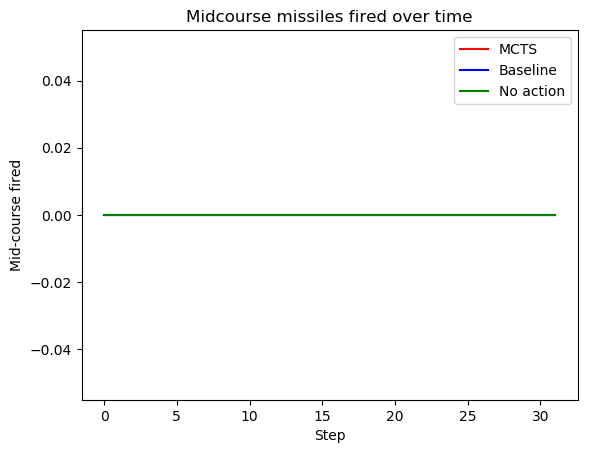

In [0]:
PyPlot.plot(nmidmcts,"r-",label="MCTS")
PyPlot.plot(nmidbase,"b-",label="Baseline")
PyPlot.plot(nmidzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Midcourse missiles fired over time")
PyPlot.ylabel("Mid-course fired")
PyPlot.xlabel("Step")
PyPlot.show()

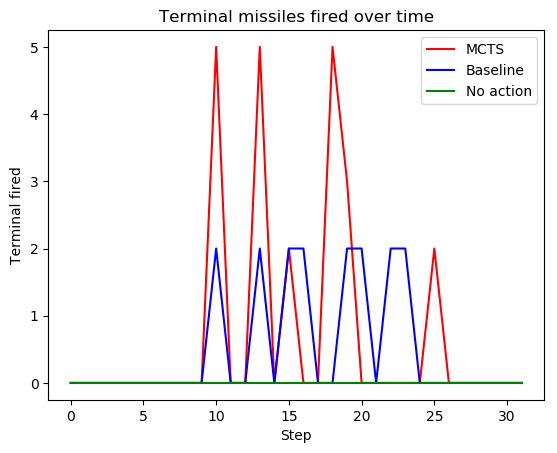

In [0]:
PyPlot.plot(ntermcts,"r-",label="MCTS")
PyPlot.plot(nterbase,"b-",label="Baseline")
PyPlot.plot(nterzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Terminal missiles fired over time")
PyPlot.ylabel("Terminal fired")
PyPlot.xlabel("Step")
PyPlot.show()

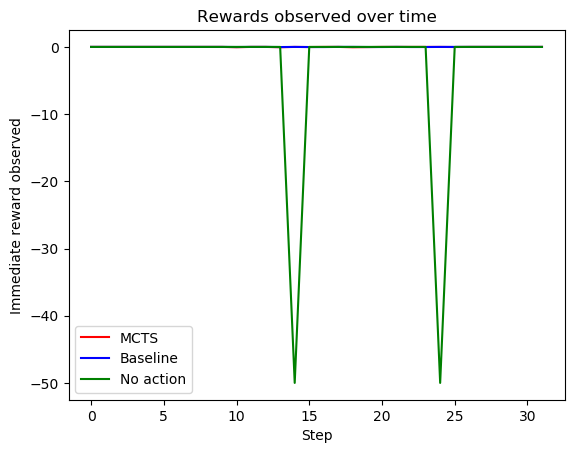

In [0]:
PyPlot.plot(rmcts,"r-",label="MCTS")
PyPlot.plot(rbase,"b-",label="Baseline")
PyPlot.plot(rzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Rewards observed over time")
PyPlot.ylabel("Immediate reward observed")
PyPlot.xlabel("Step")
PyPlot.show()

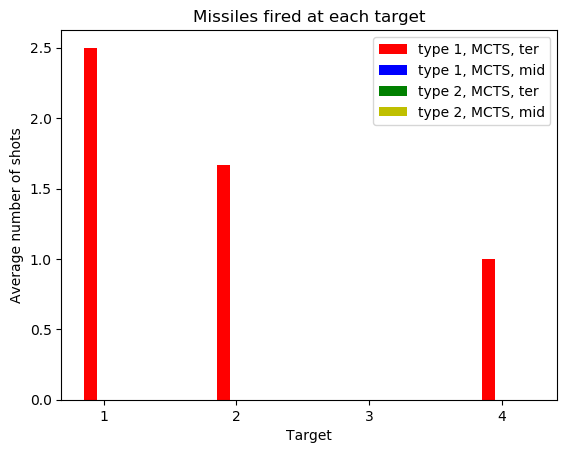

In [0]:
avgmidfiredmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter1firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter2firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgmidfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgmidfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredmcts=[[0.0,0,0,0],[0,0,0,0]]

for t in 1:ntargets
    for m in 1:ntype
        avgmidfiredmcts[m][t]=1*countmidfiredmcts[m][t]/max(1,midfiredmcts[m][t])
        avgter1firedmcts[m][t]=1*ter1firedmcts[m][t]/max(1,countter1firedmcts[m][t])
        avgter2firedmcts[m][t]=1*ter2firedmcts[m][t]/max(1,countter2firedmcts[m][t])
        avgmidfiredzero[m][t]=1*countmidfiredzero[m][t]/max(1,midfiredzero[m][t])
        avgter1firedzero[m][t]=1*ter1firedzero[m][t]/max(1,countter1firedzero[m][t])
        avgter2firedzero[m][t]=1*ter2firedzero[m][t]/max(1,countter2firedzero[m][t])
        avgmidfiredbase[m][t]=1*countmidfiredbase[m][t]/max(1,midfiredbase[m][t])
        avgter1firedbase[m][t]=1*ter1firedbase[m][t]/max(1,countter1firedbase[m][t])
        avgter2firedbase[m][t]=1*ter2firedbase[m][t]/max(1,countter2firedbase[m][t])
    end
end
        
avgterfirebase=0.5*(avgter1firedbase+avgter2firedbase)
avgterfiredzero=0.5*(avgter1firedzero+avgter2firedzero)
avgterfiredmcts=0.5*(avgter1firedmcts+avgter2firedmcts)

barwidth=0.1
t=[1,2,3,4]
W=[barwidth,barwidth,barwidth,barwidth]

PyPlot.bar(x=t,height=avgterfiredmcts[1],color="r",width=barwidth,label="type 1, MCTS, ter")
PyPlot.bar(x=t+W,height=avgmidfiredmcts[1],color="b",width=barwidth,label="type 1, MCTS, mid")
PyPlot.bar(x=t+2*W,height=avgterfiredmcts[2],color="g",width=barwidth,label="type 2, MCTS, ter")
PyPlot.bar(x=t+3*W,height=avgmidfiredmcts[2],width=barwidth,color="y",label="type 2, MCTS, mid")
PyPlot.legend()
PyPlot.title("Missiles fired at each target")
PyPlot.xticks(t+W,t)
PyPlot.ylabel("Average number of shots")
PyPlot.xlabel("Target")
PyPlot.show()

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(poor(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

rtotalzero=[]
d=1.0
rng=MersenneTwister(123)
depth=32
nmidzero=[]
nterzero=[]
rzero=[]
midfiredzero=[[0,0,0,0],[0,0,0,0]]
ter1firedzero=[[0,0,0,0],[0,0,0,0]]
ter2firedzero=[[0,0,0,0],[0,0,0,0]]
countmidfiredzero=[[0,0,0,0],[0,0,0,0]]
countter1firedzero=[[0,0,0,0],[0,0,0,0]]
countter2firedzero=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        a=action(policy,s)
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidzero,nmidhere)
        push!(nterzero,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredzero,ter1firedzero,ter2firedzero,countmidfiredzero,countter1firedzero,countter2firedzero)
        midfiredzero=copy(midfired2)
        ter1firedzero=copy(ter1fired2)
        ter2firedzero=copy(ter2fired2)
        countmidfiredzero=copy(countmidfired2)
        countter1firedzero=copy(countter1fired2)
        countter2firedzero=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rzero,r)
        d*=discount(mdp)
    end
    push!(rtotalzero,r_total)
    print(r_total)
end

-15.248986813923645-182.02452832728295-51.0-100.0-51.0-1.0-50.0-50.0-15.248986813923645-64.24898681392365-51.0-101.0-114.24898681392365-1.0-1.0-152.0-100.0-82.02452832728295-30.76125097756512-50.0-50.0-202.0-51.0-102.0-1.0-51.0-100.0-14.248986813923645-16.2489868139236440.0-52.0-132.02452832728295-14.248986813923645-50.0-114.24898681392365-52.0-81.02452832728295-33.02452832728295-14.248986813923645-15.248986813923645-1.0-15.248986813923645-152.0-47.503191837669114-1.0-52.0-1.00.0-1.0-51.0-51.0-50.0-100.0-64.24898681392365-51.0-99.88130753561820.0-148.50319183766914-150.0-2.0-50.0-129.7612509775651-2.0-14.2489868139236450.0-2.0-50.0-50.00.0-52.0-2.0-115.24898681392365-150.0-65.24898681392365-66.24898681392365-30.76125097756512-64.24898681392365-114.24898681392365-65.24898681392365-51.0-50.0-65.24898681392365-50.0-165.24898681392364-1.0-15.248986813923645-115.24898681392365-1.00.0-14.248986813923645-65.24898681392365-51.0-81.02452832728295-1.00.0-150.0-51.0-51.0-2.0-102.0

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(poor(rng,time))
end

mdp = BMDMDP()

rtotalbase=[]
d=1.0
rng=MersenneTwister(123)
depth=30
ennemyoffense=20
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]
countmidfiredbase=[[0,0,0,0],[0,0,0,0]]
countter1firedbase=[[0,0,0,0],[0,0,0,0]]
countter2firedbase=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        a=baseline(s)
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidbase,nmidhere)
        push!(nterbase,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase,countmidfiredbase,countter1firedbase,countter2firedbase)
        midfiredbase=copy(midfired2)
        ter1firedbase=copy(ter1fired2)
        ter2firedbase=copy(ter2fired2)
        countmidfiredbase=copy(countmidfired2)
        countter1firedbase=copy(countter1fired2)
        countter2firedbase=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rbase,r)
        d*=discount(mdp)
    end
    push!(rtotalbase,r_total)
    print(r_total)
end

-0.15-0.08-0.1-50.11-0.235-0.095-0.075-50.06-0.115-0.14-0.095-0.16000000000000003-14.378986813923646-0.045-0.13-0.1-0.065-50.20000000000001-1.03-0.125-0.2-14.378986813923646-0.045-100.23-0.095-0.045-1.05-0.075-0.20000000000000007-1.0999999999999996-50.230000000000004-1.1749999999999996-1.35-0.065-50.085-0.095-50.135000000000005-0.09-0.095-0.19000000000000006-0.045-0.205-0.14500000000000002-0.06-0.075-0.05-0.08-0.195-0.13-0.22500000000000003-1.0799999999999998-0.065-0.135-0.16999999999999998-50.095-0.12-0.15500000000000003-1.04-0.14-0.15999999999999998-51.095000000000006-0.135-0.085-0.085-0.255-0.135-0.195-0.075-0.095-0.10500000000000001-0.14-0.11-101.24000000000001-0.09-0.21500000000000002-0.14-64.38898681392365-0.115-1.165-0.075-51.175-0.065-0.22500000000000003-0.075-0.065-0.11-0.10500000000000001-0.30500000000000005-0.075-1.105-1.105-0.08-0.19500000000000006-0.095-0.12000000000000001-50.1-0.16000000000000003-50.120000000000005-0.19-50.11

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(poor(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

d=1.0
rng=MersenneTwister(123)
depth=32
nmidmcts=[]
ntermcts=[]
rmcts=[]
midfiredmcts=[[0,0,0,0],[0,0,0,0]]
ter1firedmcts=[[0,0,0,0],[0,0,0,0]]
ter2firedmcts=[[0,0,0,0],[0,0,0,0]]
countmidfiredmcts=[[0,0,0,0],[0,0,0,0]]
countter1firedmcts=[[0,0,0,0],[0,0,0,0]]
countter2firedmcts=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth-i,exploration_constant=5.0)
        policy=solve(solver,mdp)
        a=action(policy,s)       
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidmcts,nmidhere)
        push!(ntermcts,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredmcts,ter1firedmcts,ter2firedmcts,countmidfiredmcts,countter1firedmcts,countter2firedmcts)
        midfiredmcts=copy(midfired2)
        ter1firedmcts=copy(ter1fired2)
        ter2firedmcts=copy(ter2fired2)
        countmidfiredmcts=copy(countmidfired2)
        countter1firedmcts=copy(countter1fired2)
        countter2firedmcts=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rmcts,r)
        d*=discount(mdp)
    end
    push!(rmcts,r_total)
    print(r_total)
end

-0.175-0.8250000000000002-0.14500000000000002-1.21-0.18500000000000003-0.14500000000000002-0.14-1.135-0.22-0.26-65.46398681392365-0.11-0.11-0.14-0.235-0.22000000000000003-0.5850000000000001-0.275-0.155-0.795-0.29000000000000004-0.21000000000000002-0.27-0.125-0.7700000000000001-0.245-0.16-1.225-0.135-0.255-0.185-0.7000000000000001-0.21000000000000002-0.265-0.20999999999999996-1.515-0.21500000000000002-0.13-0.22500000000000003-0.09-1.1649999999999998-0.6200000000000001-0.105-1.2399999999999995-0.02-0.17-0.29500000000000004-0.23-0.24000000000000002-0.21000000000000002-0.14-0.4900000000000001-0.315-0.155-0.21500000000000002-0.185-51.28-0.18-0.26-100.305-0.16-0.29500000000000004-0.16000000000000003-0.615-0.15500000000000003-2.165-0.26-0.245-0.17500000000000002-0.8-0.115-0.265-1.2249999999999999-0.22999999999999995-1.2850000000000001-0.21-0.135-0.22000000000000003-50.23-0.8400000000000002-0.16499999999999998-0.7050000000000002-0.18-0.08000000000000002-1.285-1.19-0.195-0.5000000000000001-1.32

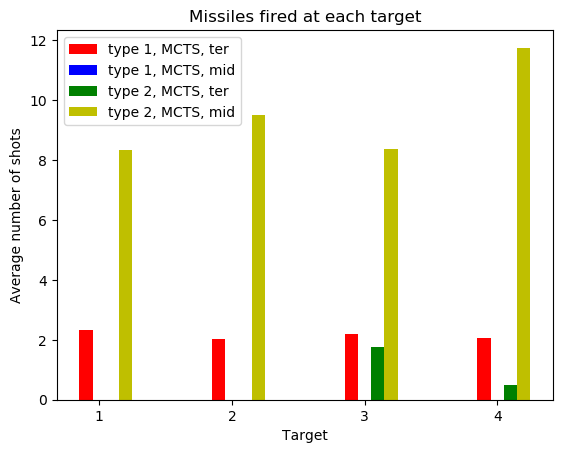

In [0]:
avgmidfiredmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter1firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter2firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgmidfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgmidfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredmcts=[[0.0,0,0,0],[0,0,0,0]]

for t in 1:ntargets
    for m in 1:ntype
        avgmidfiredmcts[m][t]=1*countmidfiredmcts[m][t]/max(1,midfiredmcts[m][t])
        avgter1firedmcts[m][t]=1*ter1firedmcts[m][t]/max(1,countter1firedmcts[m][t])
        avgter2firedmcts[m][t]=1*ter2firedmcts[m][t]/max(1,countter2firedmcts[m][t])
    end
end
        
avgterfirebase=0.5*(avgter1firedbase+avgter2firedbase)
avgterfiredzero=0.5*(avgter1firedzero+avgter2firedzero)
avgterfiredmcts=0.5*(avgter1firedmcts+avgter2firedmcts)

barwidth=0.1
t=[1,2,3,4]
W=[barwidth,barwidth,barwidth,barwidth]

PyPlot.bar(x=t,height=avgterfiredmcts[1],color="r",width=barwidth,label="type 1, MCTS, ter")
PyPlot.bar(x=t+W,height=avgmidfiredmcts[1],color="b",width=barwidth,label="type 1, MCTS, mid")
PyPlot.bar(x=t+2*W,height=avgterfiredmcts[2],color="g",width=barwidth,label="type 2, MCTS, ter")
PyPlot.bar(x=t+3*W,height=avgmidfiredmcts[2],width=barwidth,color="y",label="type 2, MCTS, mid")
PyPlot.legend()
PyPlot.title("Missiles fired at each target")
PyPlot.xticks(t+W,t)
PyPlot.ylabel("Average number of shots")
PyPlot.xlabel("Target")
PyPlot.show()

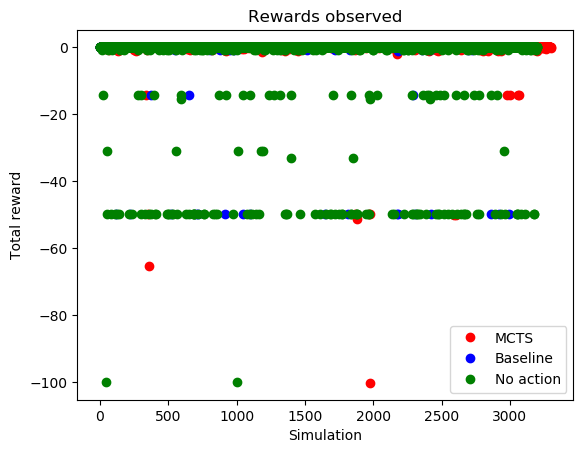

Mean total reward for MTCTS is -0.2032102790556187
Mean total reward for base is -0.3061023201472565
Mean total reward for no action is -1.7351697763923255


In [0]:
print("Mean total reward for MTCTS is ",mean(rmcts),"\n")
print("Mean total reward for base is ",mean(rbase),"\n")
print("Mean total reward for no action is ",mean(rzero),"\n")
PyPlot.plot(rmcts,"ro",label="MCTS")
PyPlot.plot(rbase,"bo",label="Baseline")
PyPlot.plot(rzero,"go",label="No action")
PyPlot.legend()
PyPlot.title("Rewards observed")
PyPlot.ylabel("Total reward")
PyPlot.xlabel("Simulation")
PyPlot.show()

# Evaluating the medium strategy

Shoots with probability 1/2
When does shoot shoots only one or 2 missiles (equally likely), at a random target. Missile tpye is 1 with pbty 0.75, if he does have a 2 it goes to the military target.

In [0]:
function medium(rng::AbstractRNG,time::Int)
    pshoot=rand(rng)   
    if pshoot<1/2 || time>20
        return([],[],[])
    end
    pdumb=rand(rng)
    pnum=rand(rng)
    type=1
    time=8
    tgt=trunc(Int,4*rand(rng))+1
    if pdumb>=0.75
        type=2
        time=10
        pmilitary=rand(rng)
        if pmilitary>0.75
            tgt=2
        end
    end
    if pnum<1/2
        pdumb2=rand(rng)
        type2=1
        time2=8
        tgt2=trunc(Int,4*rand(rng))+1
        if pdumb2>=0.75
            type2=2
            time2=10
            pmilitary2=rand(rng)
            if pmilitary2>0.75
                tgt2=2
            end
        end
        return([time,time2],[tgt,tgt2],[type,type2])
    end
    return([time],[tgt],[type])
end

medium (generic function with 1 method)

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(medium(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

r_total=0.0
d=1.0
rng=MersenneTwister(12345)
s=copy(state0)
depth=32
nmidzero=[]
nterzero=[]
rzero=[]
midfiredzero=[[0,0,0,0],[0,0,0,0]]
ter1firedzero=[[0,0,0,0],[0,0,0,0]]
ter2firedzero=[[0,0,0,0],[0,0,0,0]]
countmidfiredzero=[[0,0,0,0],[0,0,0,0]]
countter1firedzero=[[0,0,0,0],[0,0,0,0]]
countter2firedzero=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=action(policy,s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidzero,nmidhere)
    push!(nterzero,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredzero,ter1firedzero,ter2firedzero,countmidfiredzero,countter1firedzero,countter2firedzero)
    midfiredzero=copy(midfired2)
    ter1firedzero=copy(ter1fired2)
    ter2firedzero=copy(ter2fired2)
    countmidfiredzero=copy(countmidfired2)
    countter1firedzero=copy(countter1fired2)
    countter2firedzero=copy(countter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rzero,r)
    d*=discount(mdp)
end
print(r_total)

Step: 1
No action taken
Step: 2
Incoming missile of type 2 aimed at target 2 and 10 steps away 
Incoming missile of type 1 aimed at target 4 and 8 steps away 
No action taken
Step: 3
Incoming missile of type 2 aimed at target 2 and 9 steps away 
Incoming missile of type 1 aimed at target 4 and 7 steps away 
No action taken
You destroyed an ennemy missile of type 1 
Step: 4
Incoming missile of type 2 aimed at target 2 and 8 steps away 
Incoming missile of type 1 aimed at target 3 and 8 steps away 
Incoming missile of type 1 aimed at target 4 and 6 steps away 
No action taken
Step: 5
Incoming missile of type 2 aimed at target 2 and 7 steps away 
Incoming missile of type 1 aimed at target 3 and 7 steps away 
Incoming missile of type 1 aimed at target 4 and 5 steps away 
No action taken
Step: 6
Incoming missile of type 2 aimed at target 2 and 6 steps away 
Incoming missile of type 1 aimed at target 3 and 6 steps away 
Incoming missile of type 1 aimed at target 4 and 4 steps away 
No action

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(medium(rng,time))
end

mdp = BMDMDP()

r_total=0.0
d=1.0
rng=MersenneTwister(12345)
s=copy(state0)
depth=32
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]
countmidfiredbase=[[0,0,0,0],[0,0,0,0]]
countter1firedbase=[[0,0,0,0],[0,0,0,0]]
countter2firedbase=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=baseline(s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidbase,nmidhere)
    push!(nterbase,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase,countmidfiredbase,countter1firedbase,countter2firedbase)
    midfiredbase=copy(midfired2)
    ter1firedbase=copy(ter1fired2)
    ter2firedbase=copy(ter2fired2)
    countmidfiredbase=copy(countmidfired2)
    countter1firedbase=copy(countter1fired2)
    countter2firedbase=copy(countter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rbase,r)
    d*=discount(mdp)
end
print(r_total)

Step: 1
No action taken
Step: 2
Incoming missile of type 2 aimed at target 2 and 10 steps away 
Incoming missile of type 1 aimed at target 4 and 8 steps away 
No action taken
Step: 3
Incoming missile of type 2 aimed at target 2 and 9 steps away 
Incoming missile of type 1 aimed at target 3 and 8 steps away 
Incoming missile of type 1 aimed at target 4 and 7 steps away 
No action taken
You destroyed an ennemy missile of type 1 
Step: 4
Incoming missile of type 2 aimed at target 2 and 8 steps away 
Incoming missile of type 1 aimed at target 3 and 7 steps away 
Incoming missile of type 1 aimed at target 4 and 6 steps away 
No action taken
Step: 5
Incoming missile of type 1 aimed at target 3 and 8 steps away 
Incoming missile of type 2 aimed at target 2 and 7 steps away 
Incoming missile of type 1 aimed at target 3 and 6 steps away 
Incoming missile of type 1 aimed at target 4 and 5 steps away 
No action taken
Step: 6
Incoming missile of type 1 aimed at target 1 and 8 steps away 
Incoming 

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(medium(rng,time))
end

mdp = BMDMDP()

r_total=0.0
d=1.0
rng=MersenneTwister(12345)
s=copy(state0)
depth=30
nmidmcts=[]
ntermcts=[]
rmcts=[]
midfiredmcts=[[0,0,0,0],[0,0,0,0]]
ter1firedmcts=[[0,0,0,0],[0,0,0,0]]
ter2firedmcts=[[0,0,0,0],[0,0,0,0]]
countmidfiredmcts=[[0,0,0,0],[0,0,0,0]]
countter1firedmcts=[[0,0,0,0],[0,0,0,0]]
countter2firedmcts=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    print("Step: ",i,"\n")
    if i == ennemyoffense
        function enemystrategyMDP(rng::AbstractRNG)
            return(noshot(rng))
        end
        mdp=BMDMDP()
    end
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth-i,exploration_constant=5.0)
    policy=solve(solver,mdp)
    a=action(policy,s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidmcts,nmidhere)
    push!(ntermcts,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredmcts,ter1firedmcts,ter2firedmcts,countmidfiredmcts,countter1firedmcts,countter2firedmcts)
    midfiredmcts=copy(midfired2)
    ter1firedmcts=copy(ter1fired2)
    ter2firedmcts=copy(ter2fired2)
    countmidfiredmcts=copy(countmidfired2)
    countter1firedmcts=copy(countter1fired2)
    countter2firedmcts=copy(countter2fired2)
    s=copy(sp)
    push!(rmcts,r)
    r_total+=d*r
    d*=discount(mdp)
end
print(r_total)

Step: 1
No action taken
Step: 2
Incoming missile of type 2 aimed at target 2 and 10 steps away 
Incoming missile of type 1 aimed at target 4 and 8 steps away 
No action taken
Step: 3
Incoming missile of type 2 aimed at target 2 and 9 steps away 
Incoming missile of type 1 aimed at target 4 and 7 steps away 
No action taken
You destroyed an ennemy missile of type 1 
Step: 4
Incoming missile of type 2 aimed at target 2 and 8 steps away 
Incoming missile of type 1 aimed at target 3 and 8 steps away 
Incoming missile of type 1 aimed at target 4 and 6 steps away 
No action taken
Step: 5
Incoming missile of type 2 aimed at target 2 and 7 steps away 
Incoming missile of type 1 aimed at target 3 and 7 steps away 
Incoming missile of type 1 aimed at target 4 and 5 steps away 
No action taken
Step: 6
Incoming missile of type 2 aimed at target 2 and 6 steps away 
Incoming missile of type 1 aimed at target 3 and 6 steps away 
Incoming missile of type 1 aimed at target 4 and 4 steps away 
Launch fr

Launch from 1st terminal launcher: [1] missile(s) launched at missile(s) of type [1] aiming at target(s) [2]
Launch from 2nd terminal launcher: [1] missile(s) launched at missile(s) of type [1] aiming at target(s) [2]
You destroyed an ennemy missile of type 1 
You destroyed an ennemy missile of type 1 
Step: 23
Incoming missile of type 2 aimed at target 2 and 8 steps away 
Incoming missile of type 2 aimed at target 3 and 7 steps away 
Incoming missile of type 2 aimed at target 3 and 6 steps away 
Incoming missile of type 1 aimed at target 2 and 6 steps away 
Incoming missile of type 1 aimed at target 4 and 5 steps away 
Incoming missile of type 1 aimed at target 3 and 2 steps away 
Launch from 2nd terminal launcher: [1] missile(s) launched at missile(s) of type [1] aiming at target(s) [3]
You destroyed an ennemy missile of type 1 
Step: 24
Incoming missile of type 2 aimed at target 2 and 7 steps away 
Incoming missile of type 2 aimed at target 3 and 6 steps away 
Incoming missile of ty

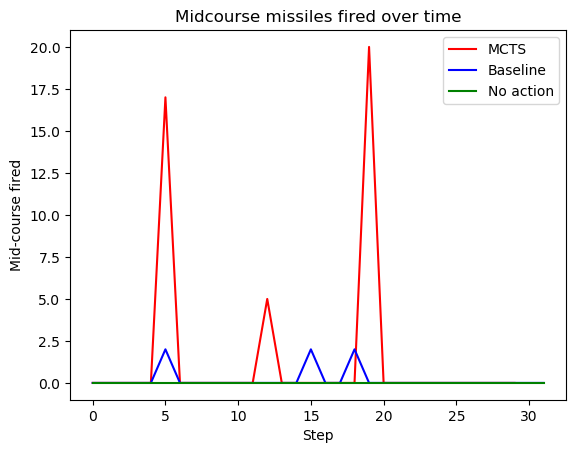

In [0]:
PyPlot.plot(nmidmcts,"r-",label="MCTS")
PyPlot.plot(nmidbase,"b-",label="Baseline")
PyPlot.plot(nmidzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Midcourse missiles fired over time")
PyPlot.ylabel("Mid-course fired")
PyPlot.xlabel("Step")
PyPlot.show()

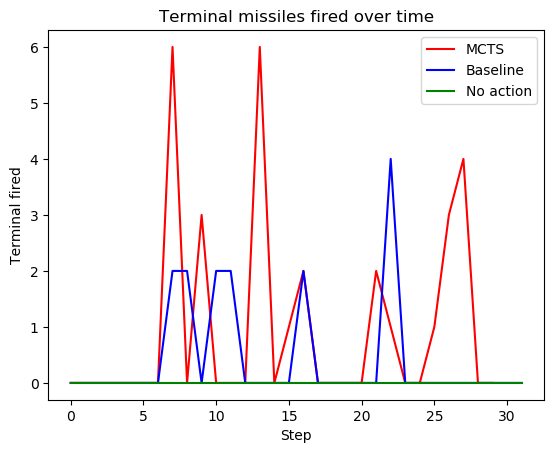

In [0]:
PyPlot.plot(ntermcts,"r-",label="MCTS")
PyPlot.plot(nterbase,"b-",label="Baseline")
PyPlot.plot(nterzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Terminal missiles fired over time")
PyPlot.ylabel("Terminal fired")
PyPlot.xlabel("Step")
PyPlot.show()

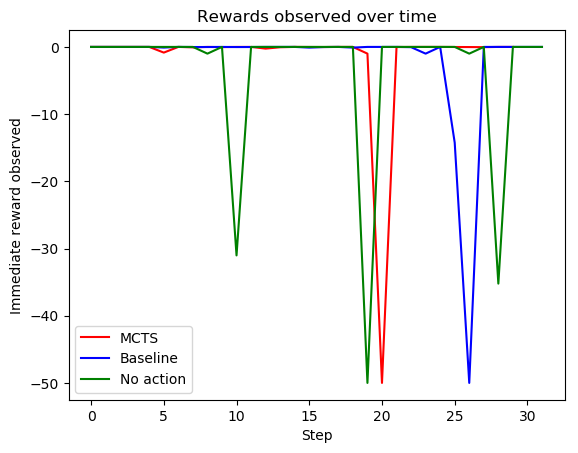

In [0]:
PyPlot.plot(rmcts,"r-",label="MCTS")
PyPlot.plot(rbase,"b-",label="Baseline")
PyPlot.plot(rzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Rewards observed over time")
PyPlot.ylabel("Immediate reward observed")
PyPlot.xlabel("Step")
PyPlot.show()

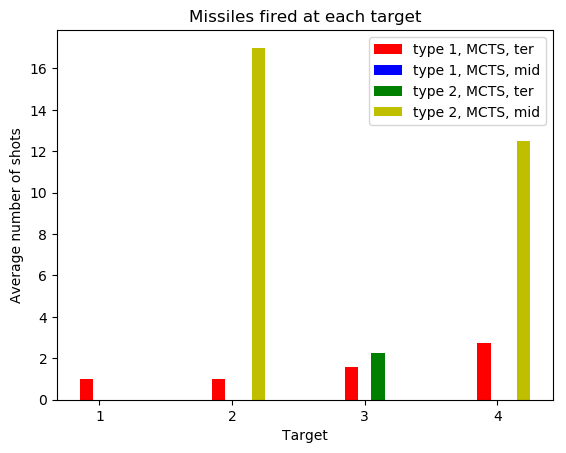

In [0]:
avgmidfiredmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter1firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter2firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgmidfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgmidfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredmcts=[[0.0,0,0,0],[0,0,0,0]]

for t in 1:ntargets
    for m in 1:ntype
        avgmidfiredmcts[m][t]=1*countmidfiredmcts[m][t]/max(1,midfiredmcts[m][t])
        avgter1firedmcts[m][t]=1*ter1firedmcts[m][t]/max(1,countter1firedmcts[m][t])
        avgter2firedmcts[m][t]=1*ter2firedmcts[m][t]/max(1,countter2firedmcts[m][t])
        avgmidfiredzero[m][t]=1*countmidfiredzero[m][t]/max(1,midfiredzero[m][t])
        avgter1firedzero[m][t]=1*ter1firedzero[m][t]/max(1,countter1firedzero[m][t])
        avgter2firedzero[m][t]=1*ter2firedzero[m][t]/max(1,countter2firedzero[m][t])
        avgmidfiredbase[m][t]=1*countmidfiredbase[m][t]/max(1,midfiredbase[m][t])
        avgter1firedbase[m][t]=1*ter1firedbase[m][t]/max(1,countter1firedbase[m][t])
        avgter2firedbase[m][t]=1*ter2firedbase[m][t]/max(1,countter2firedbase[m][t])
    end
end
        
avgterfirebase=0.5*(avgter1firedbase+avgter2firedbase)
avgterfiredzero=0.5*(avgter1firedzero+avgter2firedzero)
avgterfiredmcts=0.5*(avgter1firedmcts+avgter2firedmcts)

barwidth=0.1
t=[1,2,3,4]
W=[barwidth,barwidth,barwidth,barwidth]

PyPlot.bar(x=t,height=avgterfiredmcts[1],color="r",width=barwidth,label="type 1, MCTS, ter")
PyPlot.bar(x=t+W,height=avgmidfiredmcts[1],color="b",width=barwidth,label="type 1, MCTS, mid")
PyPlot.bar(x=t+2*W,height=avgterfiredmcts[2],color="g",width=barwidth,label="type 2, MCTS, ter")
PyPlot.bar(x=t+3*W,height=avgmidfiredmcts[2],width=barwidth,color="y",label="type 2, MCTS, mid")
PyPlot.legend()
PyPlot.title("Missiles fired at each target")
PyPlot.xticks(t+W,t)
PyPlot.ylabel("Average number of shots")
PyPlot.xlabel("Target")
PyPlot.show()

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(medium(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

d=1.0
rng=MersenneTwister(123)
depth=32
ennemyoffense=20
nmidzero=[]
nterzero=[]
rzero=[]
midfiredzero=[[0,0,0,0],[0,0,0,0]]
ter1firedzero=[[0,0,0,0],[0,0,0,0]]
ter2firedzero=[[0,0,0,0],[0,0,0,0]]
countmidfiredzero=[[0,0,0,0],[0,0,0,0]]
countter1firedzero=[[0,0,0,0],[0,0,0,0]]
countter2firedzero=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        a=action(policy,s)
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidzero,nmidhere)
        push!(nterzero,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredzero,ter1firedzero,ter2firedzero,countmidfiredzero,countter1firedzero,countter2firedzero)
        midfiredzero=copy(midfired2)
        ter1firedzero=copy(ter1fired2)
        ter2firedzero=copy(ter2fired2)
        countmidfiredzero=copy(countmidfired2)
        countter1firedzero=copy(countter1fired2)
        countter2firedzero=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rzero,r)
        d*=discount(mdp)
    end
    push!(rtotalzero,r_total)
    print(r_total)
end

-183.02452832728295-86.60999259849547-233.02452832728295-250.0427394825839-66.24898681392365-101.0-147.6516308391557-149.50319183766914-132.02452832728295-198.6516308391557-168.24641612942165-133.02452832728295-152.0-82.02452832728295-186.4615535970089-180.7612509775651-218.24641612942165-235.72559700909153-152.0-168.24641612942165-33.02452832728295-115.24898681392365-233.02452832728295-83.02452832728295-155.73721077741018-52.0-255.73721077741018-199.5031918376691-30.76125097756512-51.0-149.50319183766914-464.1322871284632-84.46155359700889-136.60999259849547-48.503191837669114-133.02452832728295-83.02452832728295-2.0-98.50319183766912-183.02452832728295-248.5031918376691-249.12168847827613-98.65163083915569-2.0-182.02452832728295-116.24898681392365-267.2464161294216-202.0-52.0-32.02452832728295-151.0-215.24898681392364-168.24641612942165-196.77383263673406-268.2464161294216-130.7612509775651-16.248986813923644-248.6516308391557-185.72559700909153-201.0-205.73721077741018-165.248986813

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(medium(rng,time))
end

mdp = BMDMDP()


rtotalbase=[]
d=1.0
rng=MersenneTwister(123)
depth=32
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]
countmidfiredbase=[[0,0,0,0],[0,0,0,0]]
countter1firedbase=[[0,0,0,0],[0,0,0,0]]
countter2firedbase=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        a=baseline(s)
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidbase,nmidhere)
        push!(nterbase,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase,countmidfiredbase,countter1firedbase,countter2firedbase)
        midfiredbase=copy(midfired2)
        ter1firedbase=copy(ter1fired2)
        ter2firedbase=copy(ter2fired2)
        countmidfiredbase=copy(countmidfired2)
        countter1firedbase=copy(countter1fired2)
        countter2firedbase=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rbase,r)
        d*=discount(mdp)
    end
    push!(rtotalbase,r_total)
    print(r_total)
end

-14.688986813923645-102.58000000000001-0.29000000000000004-14.773986813923646-2.225-51.435-1.345-1.265-0.43500000000000005-251.29-0.43500000000000005-15.983986813923645-0.585-2.1350000000000002-50.725-1.525-167.17898681392364-1.23-0.43000000000000005-2.625-0.43000000000000005-0.52-1.4149999999999994-65.92398681392365-100.42499999999998-1.03-0.22000000000000003-50.61-51.25-1.91-1.525-0.6050000000000001-2.015-2.525-51.635-1.5100000000000002-0.51-0.30500000000000005-52.335-102.53999999999999-65.76398681392365-1.4250000000000003-51.355-51.735-14.778986813923645-50.35-0.42500000000000004-2.7050000000000005-16.158986813923644-0.42000000000000004-50.415000000000006-15.583986813923644-50.495000000000005-14.778986813923645-0.43000000000000005-50.335-0.3350000000000001-51.535000000000004-101.33000000000001-101.52-0.495-51.435-65.67398681392365-51.245-1.48-0.1-0.625-50.34-50.714999999999996-0.425-14.678986813923645-0.7100000000000001-0.9149999999999999-1.8199999999999998-0.52-1.365-50.305-51.43-6

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(medium(rng,time))
end

mdp = BMDMDP()

rtotalmcts=[]
d=1.0
rng=MersenneTwister(123)
depth=32
nmidmcts=[]
ntermcts=[]
rmcts=[]
midfiredmcts=[[0,0,0,0],[0,0,0,0]]
ter1firedmcts=[[0,0,0,0],[0,0,0,0]]
ter2firedmcts=[[0,0,0,0],[0,0,0,0]]
countmidfiredmcts=[[0,0,0,0],[0,0,0,0]]
countter1firedmcts=[[0,0,0,0],[0,0,0,0]]
countter2firedmcts=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth-i,exploration_constant=5.0)
        policy=solve(solver,mdp)
        a=action(policy,s)       
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidmcts,nmidhere)
        push!(ntermcts,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredmcts,ter1firedmcts,ter2firedmcts,countmidfiredmcts,countter1firedmcts,countter2firedmcts)
        midfiredmcts=copy(midfired2)
        ter1firedmcts=copy(ter1fired2)
        ter2firedmcts=copy(ter2fired2)
        countmidfiredmcts=copy(countmidfired2)
        countter1firedmcts=copy(countter1fired2)
        countter2firedmcts=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rmcts,r)
        d*=discount(mdp)
    end
    push!(rtotalmcts,r_total)
    print(r_total)
end

-2.685-1.6149999999999998-2.16-31.60452832728295-101.29999999999998-52.495000000000005-1.4249999999999998-0.7950000000000003-2.24-84.19452832728295-2.895-0.8200000000000001-2.805-2.7300000000000004-3.19-16.573986813923643-52.324999999999996-2.8449999999999998-53.63999999999999-2.325-2.1300000000000003-1.3099999999999998-17.608986813923643-50.93500000000001-2.41-1.9749999999999999-3.65-3.2649999999999997-3.6200000000000006-18.853986813923644-1.8599999999999999-0.4900000000000001-1.435-14.628986813923644-3.035-2.37-51.51999999999999-16.858986813923647-16.973986813923645-1.76-3.3-1.535-52.105000000000004-15.713986813923647-53.145-1.9849999999999999-1.8049999999999997-1.6849999999999998-0.4650000000000001-2.7399999999999993-1.1400000000000001-2.085-3.3200000000000003-50.42-2.6050000000000004-0.8500000000000002-1.8099999999999998-15.823986813923645-0.38000000000000006-2.44-0.8000000000000003-2.12-2.675-15.998986813923645-0.505-33.32125097756513-3.845-52.5-1.23-1.9799999999999998-51.46499999

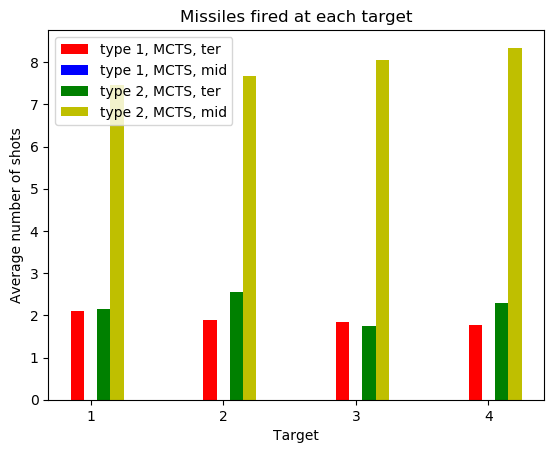

In [0]:
avgmidfiredmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter1firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter2firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgmidfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgmidfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredmcts=[[0.0,0,0,0],[0,0,0,0]]

for t in 1:ntargets
    for m in 1:ntype
        avgmidfiredmcts[m][t]=1*countmidfiredmcts[m][t]/max(1,midfiredmcts[m][t])
        avgter1firedmcts[m][t]=1*ter1firedmcts[m][t]/max(1,countter1firedmcts[m][t])
        avgter2firedmcts[m][t]=1*ter2firedmcts[m][t]/max(1,countter2firedmcts[m][t])
        avgmidfiredzero[m][t]=1*countmidfiredzero[m][t]/max(1,midfiredzero[m][t])
        avgter1firedzero[m][t]=1*ter1firedzero[m][t]/max(1,countter1firedzero[m][t])
        avgter2firedzero[m][t]=1*ter2firedzero[m][t]/max(1,countter2firedzero[m][t])
        avgmidfiredbase[m][t]=1*countmidfiredbase[m][t]/max(1,midfiredbase[m][t])
        avgter1firedbase[m][t]=1*ter1firedbase[m][t]/max(1,countter1firedbase[m][t])
        avgter2firedbase[m][t]=1*ter2firedbase[m][t]/max(1,countter2firedbase[m][t])
    end
end
        
avgterfirebase=0.5*(avgter1firedbase+avgter2firedbase)
avgterfiredzero=0.5*(avgter1firedzero+avgter2firedzero)
avgterfiredmcts=0.5*(avgter1firedmcts+avgter2firedmcts)

barwidth=0.1
t=[1,2,3,4]
W=[barwidth,barwidth,barwidth,barwidth]

PyPlot.bar(x=t,height=avgterfiredmcts[1],color="r",width=barwidth,label="type 1, MCTS, ter")
PyPlot.bar(x=t+W,height=avgmidfiredmcts[1],color="b",width=barwidth,label="type 1, MCTS, mid")
PyPlot.bar(x=t+2*W,height=avgterfiredmcts[2],color="g",width=barwidth,label="type 2, MCTS, ter")
PyPlot.bar(x=t+3*W,height=avgmidfiredmcts[2],width=barwidth,color="y",label="type 2, MCTS, mid")
PyPlot.legend()
PyPlot.title("Missiles fired at each target")
PyPlot.xticks(t+W,t)
PyPlot.ylabel("Average number of shots")
PyPlot.xlabel("Target")
PyPlot.show()

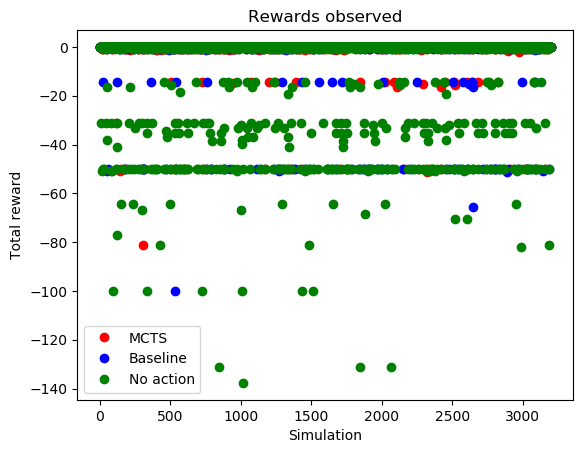

Mean total reward for MTCTS is -0.47909424956563706
Mean total reward for base is -1.0167878529144188
Mean total reward for no action is -4.584113793715044


In [0]:
print("Mean total reward for MTCTS is ",mean(rmcts),"\n")
print("Mean total reward for base is ",mean(rbase),"\n")
print("Mean total reward for no action is ",mean(rzero),"\n")
PyPlot.plot(rmcts,"ro",label="MCTS")
PyPlot.plot(rbase,"bo",label="Baseline")
# PyPlot.plot(rzero,"go",label="No action")
PyPlot.legend()
PyPlot.title("Rewards observed")
PyPlot.ylabel("Total reward")
PyPlot.xlabel("Simulation")
PyPlot.show()

# Evaluating the large strategy

Shoots with probability 2/3
When does shoot shoots up to 6 missiles, 4 to 6 with pbty 1/9, 1 or 3 with pbt 1/6 and 2 with pbty 1/3.
Half are launched at target 1, 1/6 at others

In [0]:
function large(rng::AbstractRNG,time::Int)
    pshoot=rand(rng)   
    if pshoot<1/3 || time>20
        return([],[],[])
    end
    pdumb=rand(rng)
    pnum=rand(rng)
    if pnum<1/3
        num=2
    elseif pnum<1/3+1/6
        num=3
    elseif pnum<2/3
        num=1
    elseif pnum<2/3+1/9
        num=6
    elseif pnum<2/3+2/9
        num=5
    else
        num=4
    end
    mtype=[]
    time=[]
    tgt=[]
    for i in 1:num
        pdumb=rand(rng)
        if pdumb<1/2
            push!(tgt,1)
            push!(mtype,1)
            push!(time,8)
        else
            tgthere=trunc(Int,3*rand(rng))+2
            mtypehere=1
            timehere=8
            if tgthere==2
                mtypehere=2
                timehere=10
            end
            push!(tgt,tgthere)
            push!(mtype,mtypehere)
            push!(time,timehere)
        end
    end
    return(time,tgt,mtype)
end

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(large(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

r_total=0.0
d=1.0
rng=MersenneTwister(12345)
s=copy(state0)
depth=32
nmidzero=[]
nterzero=[]
rzero=[]
midfiredzero=[[0,0,0,0],[0,0,0,0]]
ter1firedzero=[[0,0,0,0],[0,0,0,0]]
ter2firedzero=[[0,0,0,0],[0,0,0,0]]
countmidfiredzero=[[0,0,0,0],[0,0,0,0]]
countter1firedzero=[[0,0,0,0],[0,0,0,0]]
countter2firedzero=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=action(policy,s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidzero,nmidhere)
    push!(nterzero,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredzero,ter1firedzero,ter2firedzero,countmidfiredzero,countter1firedzero,countter2firedzero)
    midfiredzero=copy(midfired2)
    ter1firedzero=copy(ter1fired2)
    ter2firedzero=copy(ter2fired2)
    countmidfiredzero=copy(countmidfired2)
    countter1firedzero=copy(countter1fired2)
    countter2firedzero=copy(countter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rzero,r)
    d*=discount(mdp)
end
print(r_total)

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(large(rng,time))
end

mdp = BMDMDP()

r_total=0.0
d=1.0
rng=MersenneTwister(12345)
s=copy(state0)
depth=32
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]
countmidfiredbase=[[0,0,0,0],[0,0,0,0]]
countter1firedbase=[[0,0,0,0],[0,0,0,0]]
countter2firedbase=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    
    print("Step: ",i,"\n")
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    a=baseline(s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidbase,nmidhere)
    push!(nterbase,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase,countmidfiredbase,countter1firedbase,countter2firedbase)
    midfiredbase=copy(midfired2)
    ter1firedbase=copy(ter1fired2)
    ter2firedbase=copy(ter2fired2)
    countmidfiredbase=copy(countmidfired2)
    countter1firedbase=copy(countter1fired2)
    countter2firedbase=copy(countter2fired2)
    s=copy(sp)
    r_total+=d*r
    push!(rbase,r)
    d*=discount(mdp)
end
print(r_total)

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(large(rng,time))
end

mdp = BMDMDP()

r_total=0.0
d=1.0
rng=MersenneTwister(12345)
s=copy(state0)
depth=30
nmidmcts=[]
ntermcts=[]
rmcts=[]
midfiredmcts=[[0,0,0,0],[0,0,0,0]]
ter1firedmcts=[[0,0,0,0],[0,0,0,0]]
ter2firedmcts=[[0,0,0,0],[0,0,0,0]]
countmidfiredmcts=[[0,0,0,0],[0,0,0,0]]
countter1firedmcts=[[0,0,0,0],[0,0,0,0]]
countter2firedmcts=[[0,0,0,0],[0,0,0,0]]

for i in 1:depth
    print("Step: ",i,"\n")
    if i == ennemyoffense
        function enemystrategyMDP(rng::AbstractRNG)
            return(noshot(rng))
        end
        mdp=BMDMDP()
    end
    if sum(s[k]!=-1 for k in 3*(nmid+nter)+ntargets+1:3*(nmid+nter)+ntargets+ntrack)!=0
        indx=0
        while s[3*(nmid+nter)+ntargets+1+indx]>0
            print("Incoming missile of type ",s[3*(nmid+nter)+ntargets+1+indx+2*ntrack]," aimed at target ",s[3*(nmid+nter)+ntargets+1+indx+ntrack] ," and ",s[3*(nmid+nter)+ntargets+1+indx]," steps away \n")
            indx+=1
        end
    end
    solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth-i,exploration_constant=5.0)
    policy=solve(solver,mdp)
    a=action(policy,s)
    nmidhere=sum(a[s] for s in 1:nmid*ntrack)
    nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
    push!(nmidmcts,nmidhere)
    push!(ntermcts,nterhere)
    sp,r=generate_sr(mdp,s,a,rng)
    midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state(s,a,sp,midfiredmcts,ter1firedmcts,ter2firedmcts,countmidfiredmcts,countter1firedmcts,countter2firedmcts)
    midfiredmcts=copy(midfired2)
    ter1firedmcts=copy(ter1fired2)
    ter2firedmcts=copy(ter2fired2)
    countmidfiredmcts=copy(countmidfired2)
    countter1firedmcts=copy(countter1fired2)
    countter2firedmcts=copy(countter2fired2)
    s=copy(sp)
    push!(rmcts,r)
    r_total+=d*r
    d*=discount(mdp)
end
print(r_total)

In [0]:
PyPlot.plot(nmidmcts,"r-",label="MCTS")
PyPlot.plot(nmidbase,"b-",label="Baseline")
PyPlot.plot(nmidzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Midcourse missiles fired over time")
PyPlot.ylabel("Mid-course fired")
PyPlot.xlabel("Step")
PyPlot.show()

In [0]:
PyPlot.plot(ntermcts,"r-",label="MCTS")
PyPlot.plot(nterbase,"b-",label="Baseline")
PyPlot.plot(nterzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Terminal missiles fired over time")
PyPlot.ylabel("Terminal fired")
PyPlot.xlabel("Step")
PyPlot.show()

In [0]:
PyPlot.plot(rmcts,"r-",label="MCTS")
PyPlot.plot(rbase,"b-",label="Baseline")
PyPlot.plot(rzero,"g-",label="No action")
PyPlot.legend()
PyPlot.title("Rewards observed over time")
PyPlot.ylabel("Immediate reward observed")
PyPlot.xlabel("Step")
PyPlot.show()

In [0]:
avgmidfiredmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter1firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter2firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgmidfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgmidfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredmcts=[[0.0,0,0,0],[0,0,0,0]]

for t in 1:ntargets
    for m in 1:ntype
        avgmidfiredmcts[m][t]=1*countmidfiredmcts[m][t]/max(1,midfiredmcts[m][t])
        avgter1firedmcts[m][t]=1*ter1firedmcts[m][t]/max(1,countter1firedmcts[m][t])
        avgter2firedmcts[m][t]=1*ter2firedmcts[m][t]/max(1,countter2firedmcts[m][t])
        avgmidfiredzero[m][t]=1*countmidfiredzero[m][t]/max(1,midfiredzero[m][t])
        avgter1firedzero[m][t]=1*ter1firedzero[m][t]/max(1,countter1firedzero[m][t])
        avgter2firedzero[m][t]=1*ter2firedzero[m][t]/max(1,countter2firedzero[m][t])
        avgmidfiredbase[m][t]=1*countmidfiredbase[m][t]/max(1,midfiredbase[m][t])
        avgter1firedbase[m][t]=1*ter1firedbase[m][t]/max(1,countter1firedbase[m][t])
        avgter2firedbase[m][t]=1*ter2firedbase[m][t]/max(1,countter2firedbase[m][t])
    end
end
        
avgterfirebase=0.5*(avgter1firedbase+avgter2firedbase)
avgterfiredzero=0.5*(avgter1firedzero+avgter2firedzero)
avgterfiredmcts=0.5*(avgter1firedmcts+avgter2firedmcts)

barwidth=0.1
t=[1,2,3,4]
W=[barwidth,barwidth,barwidth,barwidth]

PyPlot.bar(x=t,height=avgterfiredmcts[1],color="r",width=barwidth,label="type 1, MCTS, ter")
PyPlot.bar(x=t+W,height=avgmidfiredmcts[1],color="b",width=barwidth,label="type 1, MCTS, mid")
PyPlot.bar(x=t+2*W,height=avgterfiredmcts[2],color="g",width=barwidth,label="type 2, MCTS, ter")
PyPlot.bar(x=t+3*W,height=avgmidfiredmcts[2],width=barwidth,color="y",label="type 2, MCTS, mid")
PyPlot.legend()
PyPlot.title("Missiles fired at each target")
PyPlot.xticks(t+W,t)
PyPlot.ylabel("Average number of shots")
PyPlot.xlabel("Target")
PyPlot.show()

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(large(rng,time))
end

mdp = BMDMDP()

# policy that maps every input to no action
policy = FunctionPolicy(o->action0)

d=1.0
rng=MersenneTwister(123)
depth=32
ennemyoffense=20
nmidzero=[]
nterzero=[]
rzero=[]
midfiredzero=[[0,0,0,0],[0,0,0,0]]
ter1firedzero=[[0,0,0,0],[0,0,0,0]]
ter2firedzero=[[0,0,0,0],[0,0,0,0]]
countmidfiredzero=[[0,0,0,0],[0,0,0,0]]
countter1firedzero=[[0,0,0,0],[0,0,0,0]]
countter2firedzero=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        a=action(policy,s)
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidzero,nmidhere)
        push!(nterzero,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredzero,ter1firedzero,ter2firedzero,countmidfiredzero,countter1firedzero,countter2firedzero)
        midfiredzero=copy(midfired2)
        ter1firedzero=copy(ter1fired2)
        ter2firedzero=copy(ter2fired2)
        countmidfiredzero=copy(countmidfired2)
        countter1firedzero=copy(countter1fired2)
        countter2firedzero=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rzero,r)
        d*=discount(mdp)
    end
    push!(rtotalzero,r_total)
    print(r_total)
end

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(large(rng,time))
end

mdp = BMDMDP()


rtotalbase=[]
d=1.0
rng=MersenneTwister(123)
depth=32
nmidbase=[]
nterbase=[]
rbase=[]
midfiredbase=[[0,0,0,0],[0,0,0,0]]
ter1firedbase=[[0,0,0,0],[0,0,0,0]]
ter2firedbase=[[0,0,0,0],[0,0,0,0]]
countmidfiredbase=[[0,0,0,0],[0,0,0,0]]
countter1firedbase=[[0,0,0,0],[0,0,0,0]]
countter2firedbase=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        a=baseline(s)
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidbase,nmidhere)
        push!(nterbase,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredbase,ter1firedbase,ter2firedbase,countmidfiredbase,countter1firedbase,countter2firedbase)
        midfiredbase=copy(midfired2)
        ter1firedbase=copy(ter1fired2)
        ter2firedbase=copy(ter2fired2)
        countmidfiredbase=copy(countmidfired2)
        countter1firedbase=copy(countter1fired2)
        countter2firedbase=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rbase,r)
        d*=discount(mdp)
    end
    push!(rtotalbase,r_total)
    print(r_total)
end

In [0]:
function enemystrategyMDP(rng::AbstractRNG,time::Int)
    return(large(rng,time))
end

mdp = BMDMDP()

rtotalmcts=[]
d=1.0
rng=MersenneTwister(123)
depth=32
nmidmcts=[]
ntermcts=[]
rmcts=[]
midfiredmcts=[[0,0,0,0],[0,0,0,0]]
ter1firedmcts=[[0,0,0,0],[0,0,0,0]]
ter2firedmcts=[[0,0,0,0],[0,0,0,0]]
countmidfiredmcts=[[0,0,0,0],[0,0,0,0]]
countter1firedmcts=[[0,0,0,0],[0,0,0,0]]
countter2firedmcts=[[0,0,0,0],[0,0,0,0]]

for rep in 1:100
    s=copy(state0)
    r_total=0.0
    for i in 1:depth
        solver = MCTSSolver(enable_tree_vis=true,n_iterations=500,depth=depth-i,exploration_constant=5.0)
        policy=solve(solver,mdp)
        a=action(policy,s)       
        nmidhere=sum(a[s] for s in 1:nmid*ntrack)
        nterhere=sum(a[s] for s in 1+nmid*ntrack:nmid*ntrack+nter*ntrack)
        push!(nmidmcts,nmidhere)
        push!(ntermcts,nterhere)
        sp,r=generate_sr(mdp,s,a,rng)
        midfired2,ter1fired2,ter2fired2,countmidfired2,countter1fired2,countter2fired2=collect_state2(s,a,sp,midfiredmcts,ter1firedmcts,ter2firedmcts,countmidfiredmcts,countter1firedmcts,countter2firedmcts)
        midfiredmcts=copy(midfired2)
        ter1firedmcts=copy(ter1fired2)
        ter2firedmcts=copy(ter2fired2)
        countmidfiredmcts=copy(countmidfired2)
        countter1firedmcts=copy(countter1fired2)
        countter2firedmcts=copy(countter2fired2)
        s=copy(sp)
        r_total+=d*r
        push!(rmcts,r)
        d*=discount(mdp)
    end
    push!(rtotalmcts,r_total)
    print(r_total)
end

In [0]:
avgmidfiredmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter1firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgter2firedmcts=[[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]
avgmidfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredzero=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedzero=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgmidfiredbase=[[0.0,0,0,0],[0,0,0,0]]
avgter1firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgter2firedbase=[[0.0,0,0,0],[0,0,0,0]]
avgterfiredmcts=[[0.0,0,0,0],[0,0,0,0]]

for t in 1:ntargets
    for m in 1:ntype
        avgmidfiredmcts[m][t]=1*countmidfiredmcts[m][t]/max(1,midfiredmcts[m][t])
        avgter1firedmcts[m][t]=1*ter1firedmcts[m][t]/max(1,countter1firedmcts[m][t])
        avgter2firedmcts[m][t]=1*ter2firedmcts[m][t]/max(1,countter2firedmcts[m][t])
        avgmidfiredzero[m][t]=1*countmidfiredzero[m][t]/max(1,midfiredzero[m][t])
        avgter1firedzero[m][t]=1*ter1firedzero[m][t]/max(1,countter1firedzero[m][t])
        avgter2firedzero[m][t]=1*ter2firedzero[m][t]/max(1,countter2firedzero[m][t])
        avgmidfiredbase[m][t]=1*countmidfiredbase[m][t]/max(1,midfiredbase[m][t])
        avgter1firedbase[m][t]=1*ter1firedbase[m][t]/max(1,countter1firedbase[m][t])
        avgter2firedbase[m][t]=1*ter2firedbase[m][t]/max(1,countter2firedbase[m][t])
    end
end
        
avgterfirebase=0.5*(avgter1firedbase+avgter2firedbase)
avgterfiredzero=0.5*(avgter1firedzero+avgter2firedzero)
avgterfiredmcts=0.5*(avgter1firedmcts+avgter2firedmcts)

barwidth=0.1
t=[1,2,3,4]
W=[barwidth,barwidth,barwidth,barwidth]

PyPlot.bar(x=t,height=avgterfiredmcts[1],color="r",width=barwidth,label="type 1, MCTS, ter")
PyPlot.bar(x=t+W,height=avgmidfiredmcts[1],color="b",width=barwidth,label="type 1, MCTS, mid")
PyPlot.bar(x=t+2*W,height=avgterfiredmcts[2],color="g",width=barwidth,label="type 2, MCTS, ter")
PyPlot.bar(x=t+3*W,height=avgmidfiredmcts[2],width=barwidth,color="y",label="type 2, MCTS, mid")
PyPlot.legend()
PyPlot.title("Missiles fired at each target")
PyPlot.xticks(t+W,t)
PyPlot.ylabel("Average number of shots")
PyPlot.xlabel("Target")
PyPlot.show()

In [0]:
print("Mean total reward for MTCTS is ",mean(rmcts),"\n")
print("Mean total reward for base is ",mean(rbase),"\n")
print("Mean total reward for no action is ",mean(rzero),"\n")
PyPlot.plot(rmcts,"ro",label="MCTS")
PyPlot.plot(rbase,"bo",label="Baseline")
PyPlot.plot(rzero,"go",label="No action")
PyPlot.legend()
PyPlot.title("Rewards observed")
PyPlot.ylabel("Total reward")
PyPlot.xlabel("Simulation")
PyPlot.show()